/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **0. Machine Learning Pipeline - Data Analysis**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

        En los siguientes cuadernos, repasaremos la implementación de cada uno de los pasos en el Pipeline de Aprendizaje Automático.

        Discutiremos:

        1. **Data Analysis**
        2. Feature Engineering
        3. Feature Selection
        4. Model Training
        5. Obtaining Predictions / Scoring


        Usaremos el conjunto de datos de precios de viviendas disponible en [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Consulta a continuación para más detalles.

        ===================================================================================================

        ## Predicción del Precio de Venta de Casas

        El objetivo del proyecto es construir un modelo de aprendizaje automático para predecir el precio de venta de viviendas basado en diferentes variables explicativas que describen aspectos de las casas residenciales.


        ## ¿Por qué es esto importante?

        Predecir los precios de las viviendas es útil para identificar inversiones fructíferas o para determinar si el precio anunciado de una casa está sobreestimado o subestimado.


        ## ¿Cuál es el objetivo del modelo de aprendizaje automático?

        Nuestro objetivo es minimizar la diferencia entre el precio real y el precio estimado por nuestro modelo. Evaluaremos el rendimiento del modelo con el:

        1. mean squared error (mse)
        2. root squared of the mean squared error (rmse)
        3. r-squared (r2).


        ## ¿Cómo descargo el conjunto de datos?

        - Visita [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

        - Desplázate hacia la parte inferior de la página, haz clic en el enlace **'train.csv'**, y luego haz clic en el botón azul 'descargar' hacia la derecha de la pantalla para descargar el conjunto de datos.

        - El archivo se descargará con el nombre de **'test.csv'** y guárdalo en el directorio junto con los cuadernos.



        **Notas:**

        -  Necesitas estar conectado a Kaggle para poder descargar los conjuntos de datos.
        -  Necesitas aceptar los términos y condiciones de la competencia para poder descargar el conjunto de datos.

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **I. Carga de librerias**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [1]:
!pip install seaborn

In [114]:
# %%capture
# !pip install pycaret[full]

In [2]:
# ============================ Importación de librerias ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

#========================== Librerias de Regresión ==========================
#Librerias para mejores subconjuntos
import itertools
import time
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from sklearn.ensemble import IsolationForest#nos identifica las anomalias
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#========================== Metricas ========================================
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#================== Transformación de datos =================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# para la yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el cuaderno
pd.pandas.set_option('display.max_columns', None)

#DESCARGAR PICKLE
import pickle

sns.set(style='whitegrid', context='notebook')
plt.style.use('default')

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **II. Carga de Dataset de Datos**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------

### **2. Carga de Dataset y pre-procesamiento de Datos de LIMS**

------------------------------------------------------------------

------------------------------------------------------------------------------------
#### **2.1. Carga de datos**
------------------------------------------------------------------------------------

In [3]:
# cargar dataset
data = pd.read_csv('./Input/data_mod_ttv.csv')

# filas y columnas del dataset
print(data.shape)

# visualise the dataset
data.head()

(1237, 37)


FECHAENSAYO  Al2O3    C3A  C4AF  CaCO3   CaO  Cal Libre  Caliza     Cl  \
0  2024-01-02    4.6   7.30  8.86   5.29  62.5        1.5    3.35  0.047   
1  2024-01-03    4.7   7.62  8.87   5.40  62.4        1.4    3.40  0.044   
2  2024-01-04    5.4   9.99  7.77  16.11  50.7        0.9   23.00  0.027   
3  2024-01-04    4.7   7.62  8.93   4.84  62.8        1.5    3.40  0.037   
4  2024-01-06    6.9  13.89  7.72   9.80  52.8        0.7    4.50  0.028   

   Consistencia Normal  Contracción en autoclave  Expansión en autoclave  \
0                 25.1                       NaN                    0.14   
1                 25.2                       NaN                    0.10   
2                 28.3                       NaN                    0.05   
3                 25.1                       NaN                    0.12   
4                 30.0                       NaN                    0.05   

   Fe2O3  Fluidez  Fraguado final  Fraguado inicial  H2O Pasta  H2O mortero  \
0   2.91    119.0           235.0             114.0      163.0        359.0   
1   2.91    119.0           235.0             113.0      164.0        359.0   
2   2.55    106.0           290.0             186.0      184.0        388.0   
3   2.93    122.0           230.0             110.0      163.0        359.0   
4   2.54    110.0           310.0             186.0      195.0        393.0   

    K2O  MgO  Na2O  Polvo Filtro  Puzolana  Pérdida por ignición  RC 1 día  \
0  0.77  2.3  0.34           NaN       NaN                  2.88    2250.0   
1  0.76  2.2  0.33           NaN       NaN                  2.58    2240.0   
2  1.01  2.1  0.29           NaN       8.0                  9.85    1300.0   
3  0.76  2.2  0.32           NaN       NaN                  2.69    2210.0   
4  1.04  2.3  0.34           NaN      14.0                  4.15    1400.0   

   Reproceso  Residuo insoluble  Retenido M325  Retenido M450   SO3  SiO2  \
0        NaN               0.84            1.2            6.8  2.90  20.1   
1        NaN               0.87            1.2            6.8  2.82  19.8   
2        0.0                NaN            1.6            7.6  2.47  21.9   
3        NaN               0.83            0.8            7.2  2.75  20.1   
4        0.0                NaN            2.0            8.8  2.23  28.0   

   Superficie específica  Yeso  Álcalis Equivalentes Tipo_Cemento    C3S  \
0                 4130.0  6.11                  0.85            I  52.12   
1                 4080.0  5.88                  0.83            I  53.42   
2                 6100.0  4.75                  0.95          ICo  27.40   
3                 4110.0  5.90                  0.82            I  53.25   
4                 5100.0  4.40                  1.02       MS(MH)  31.43   

   Periodo  
0   202401  
1   202401  
2   202401  
3   202401  
4   202401

In [4]:
data.shape

(1237, 37)

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **III. Análisis y Exploración de Datos - Resistencia 1 día**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**Analizaremos lo siguiente:**

        1. La variable objetivo (The target variable)
        2. Tipos de variables (categóricas y numéricas)
        3. Datos faltantes (Missing data)
        4. Variables numéricas
            - Discretas
            - Continuas
            - Distribuciones
            - Transformaciones

        5. Variables Categóricas
            - Cardinalidad
            - Etiquetas Raras
            - Mapeos Especiales
            
        6. Recursos adicionales de Lectura

        Target

        Comencemos explorando la distribución del objetivo.

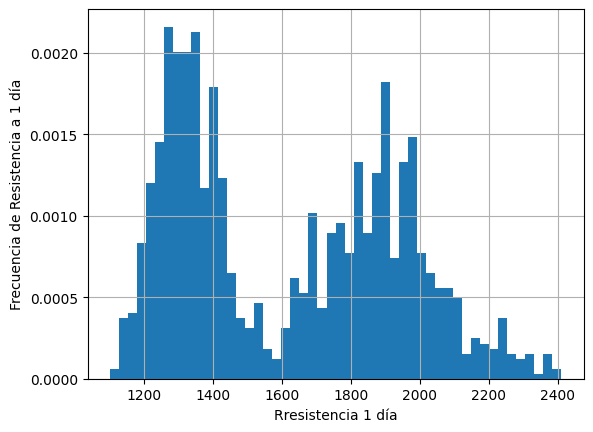

In [5]:
# Histograma para evaluar la distribución objetivo

data['RC 1 día'].hist(bins=50, density=True)
plt.ylabel('Frecuencia de Resistencia a 1 día')
plt.xlabel('Rresistencia 1 día')
plt.show()

Podemos ver que el objetivo es continuo y que la distribución está sesgada hacia la derecha.

Podemos mejorar la dispersión de los valores con una transformación matemática.

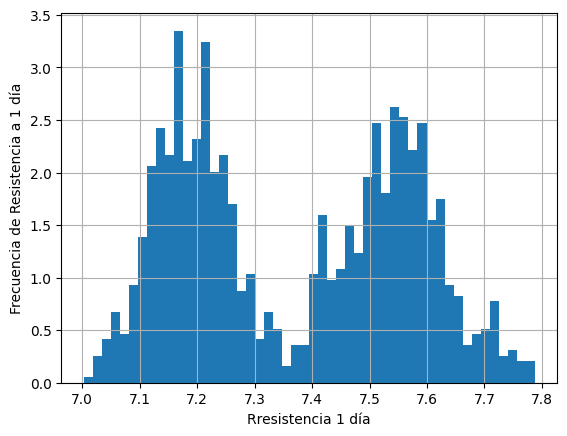

In [6]:
# Tranformamos el objetivo usando el logaritmo

np.log(data['RC 1 día']).hist(bins=50, density=True)
plt.ylabel('Frecuencia de Resistencia a 1 día')
plt.xlabel('Rresistencia 1 día')
plt.show()

-------------------------------------------------------------------------------
#### **3.1. Modelo resistencia 1 día de cemento**
-------------------------------------------------------------------------------

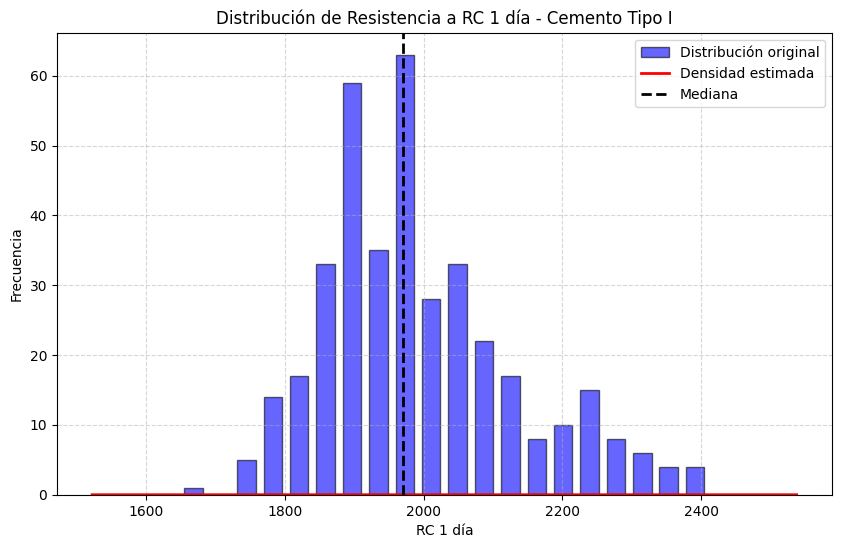

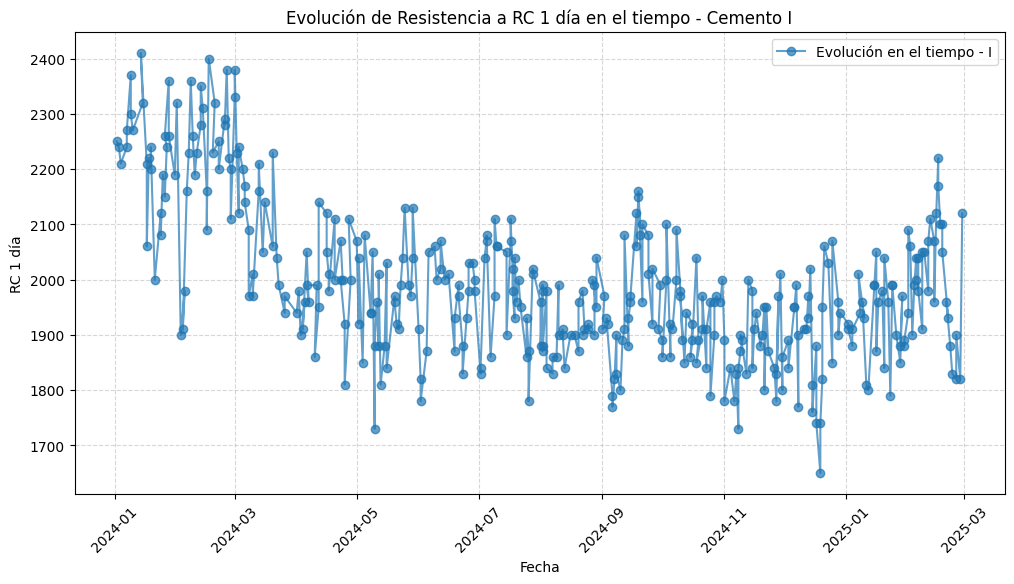

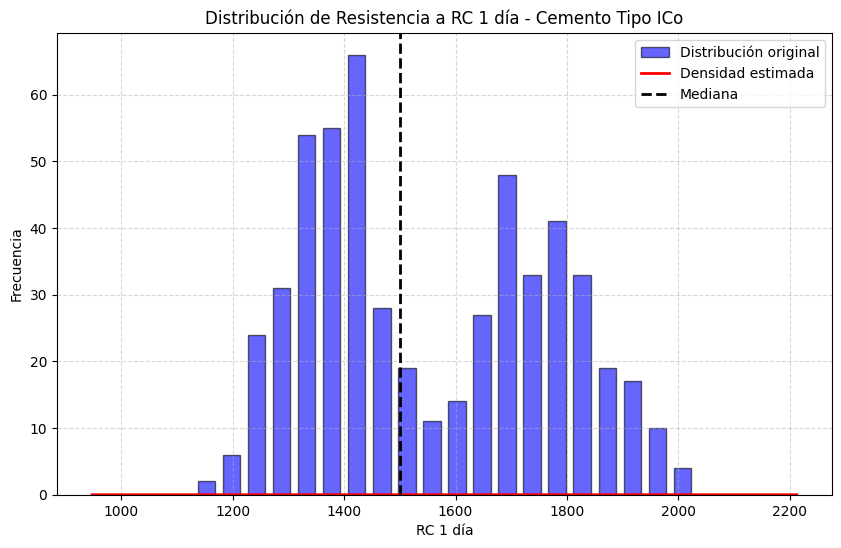

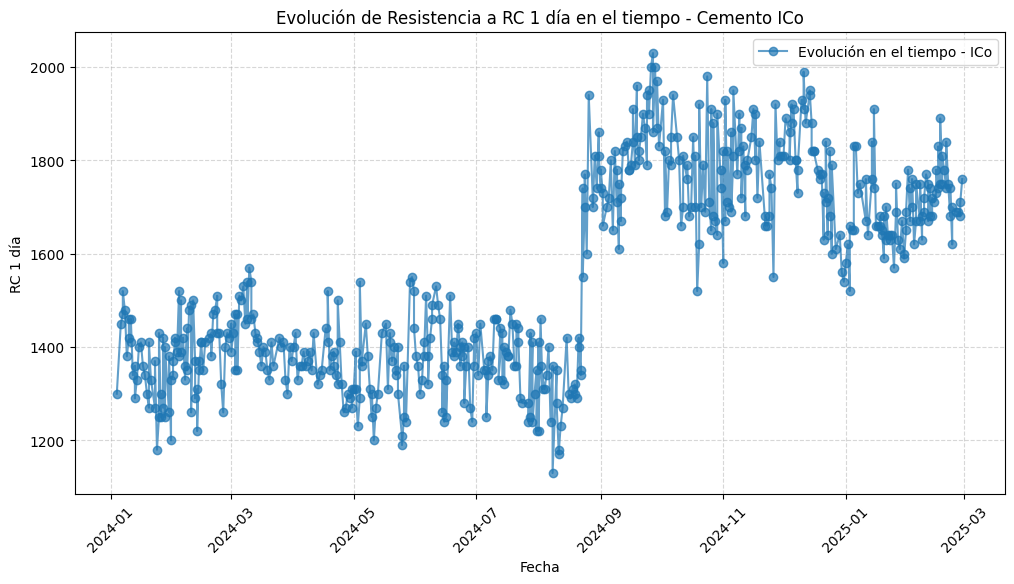

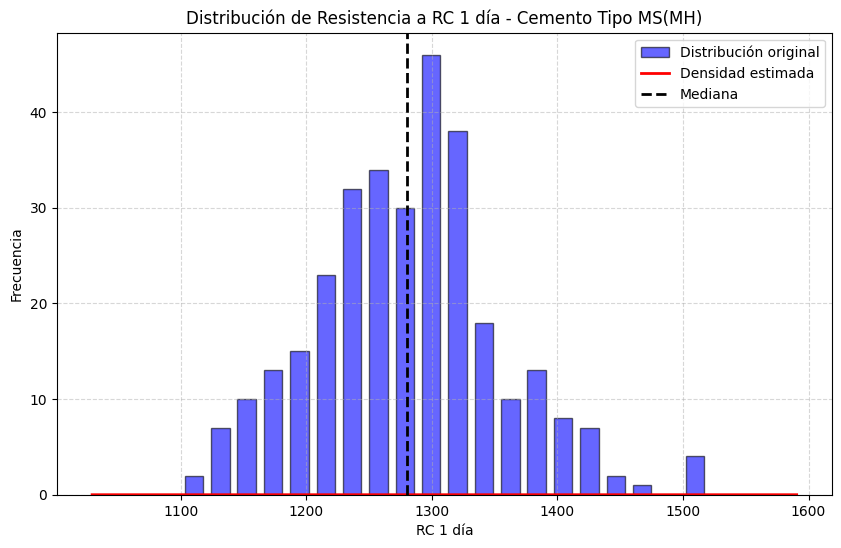

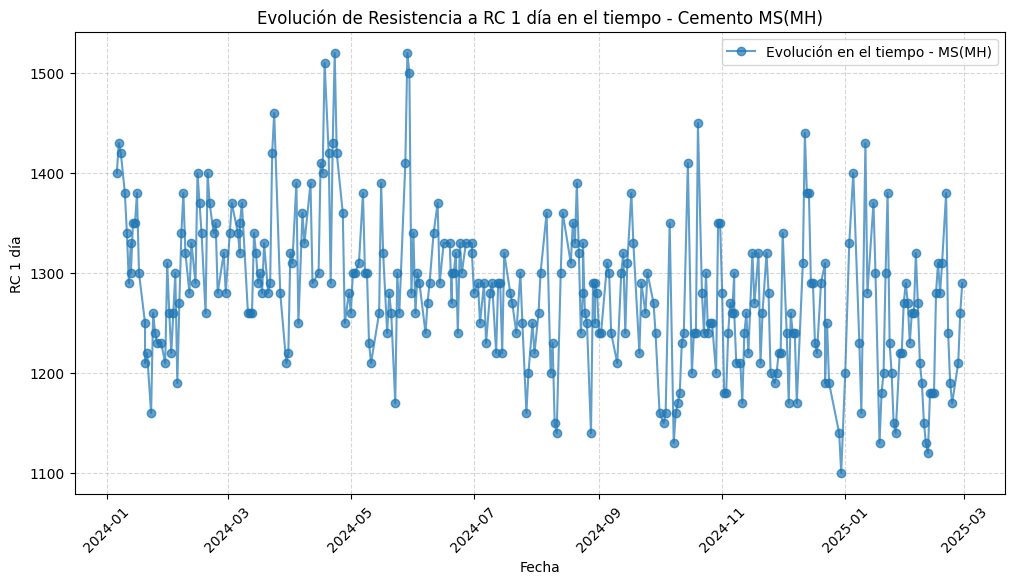

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1 = data  # Asegúrate de que esta variable contiene el DataFrame con fechas

columna_rcNdias = 'RC 1 día'
columna_fecha = 'FECHAENSAYO'  # Asegúrate de que tu DataFrame tenga una columna de fechas
columna_cemento = 'Tipo_Cemento'

# Convertir la columna de fecha a datetime si aún no lo está
df1[columna_fecha] = pd.to_datetime(df1[columna_fecha])

# Filtrar valores positivos de la resistencia antes de graficar
df1 = df1[df1[columna_rcNdias] > 0]

# Generar el histograma con franja de tiempo para cada categoría de cemento
for categoria in df1[columna_cemento].unique():
    sub_df = df1[df1[columna_cemento] == categoria]
    
    plt.figure(figsize=(10, 6))

    # Histograma de resistencia a la compresión
    plt.hist(sub_df[columna_rcNdias], bins=20, color="blue", alpha=0.6, edgecolor="black", rwidth=0.7, label="Distribución original")

    # Agregar una franja de valores por serie de tiempo usando KDE plot
    sns.kdeplot(sub_df[columna_rcNdias], color="red", linewidth=2, label="Densidad estimada")

    # Línea para la mediana de la distribución
    plt.axvline(sub_df[columna_rcNdias].median(), color="black", linestyle="dashed", linewidth=2, label="Mediana")

    plt.title(f"Distribución de Resistencia a {columna_rcNdias} - Cemento Tipo {categoria}")
    plt.xlabel(columna_rcNdias)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

    # 📌 **Gráfico adicional: Evolución de la resistencia en el tiempo**
    plt.figure(figsize=(12, 6))
    plt.plot(sub_df[columna_fecha], sub_df[columna_rcNdias], marker='o', linestyle='-', alpha=0.7, label=f"Evolución en el tiempo - {categoria}")

    plt.title(f"Evolución de Resistencia a {columna_rcNdias} en el tiempo - Cemento {categoria}")
    plt.xlabel("Fecha")
    plt.ylabel(columna_rcNdias)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

In [8]:
df1.head(3)

FECHAENSAYO  Al2O3   C3A  C4AF  CaCO3   CaO  Cal Libre  Caliza     Cl  \
0  2024-01-02    4.6  7.30  8.86   5.29  62.5        1.5    3.35  0.047   
1  2024-01-03    4.7  7.62  8.87   5.40  62.4        1.4    3.40  0.044   
2  2024-01-04    5.4  9.99  7.77  16.11  50.7        0.9   23.00  0.027   

   Consistencia Normal  Contracción en autoclave  Expansión en autoclave  \
0                 25.1                       NaN                    0.14   
1                 25.2                       NaN                    0.10   
2                 28.3                       NaN                    0.05   

   Fe2O3  Fluidez  Fraguado final  Fraguado inicial  H2O Pasta  H2O mortero  \
0   2.91    119.0           235.0             114.0      163.0        359.0   
1   2.91    119.0           235.0             113.0      164.0        359.0   
2   2.55    106.0           290.0             186.0      184.0        388.0   

    K2O  MgO  Na2O  Polvo Filtro  Puzolana  Pérdida por ignición  RC 1 día  \
0  0.77  2.3  0.34           NaN       NaN                  2.88    2250.0   
1  0.76  2.2  0.33           NaN       NaN                  2.58    2240.0   
2  1.01  2.1  0.29           NaN       8.0                  9.85    1300.0   

   Reproceso  Residuo insoluble  Retenido M325  Retenido M450   SO3  SiO2  \
0        NaN               0.84            1.2            6.8  2.90  20.1   
1        NaN               0.87            1.2            6.8  2.82  19.8   
2        0.0                NaN            1.6            7.6  2.47  21.9   

   Superficie específica  Yeso  Álcalis Equivalentes Tipo_Cemento    C3S  \
0                 4130.0  6.11                  0.85            I  52.12   
1                 4080.0  5.88                  0.83            I  53.42   
2                 6100.0  4.75                  0.95          ICo  27.40   

   Periodo  
0   202401  
1   202401  
2   202401

-------------------------------------------------------------------------------
#### **3.2. Modelo resistencia 1 día de cemento - Aplicando LOGARITMOS**
-------------------------------------------------------------------------------

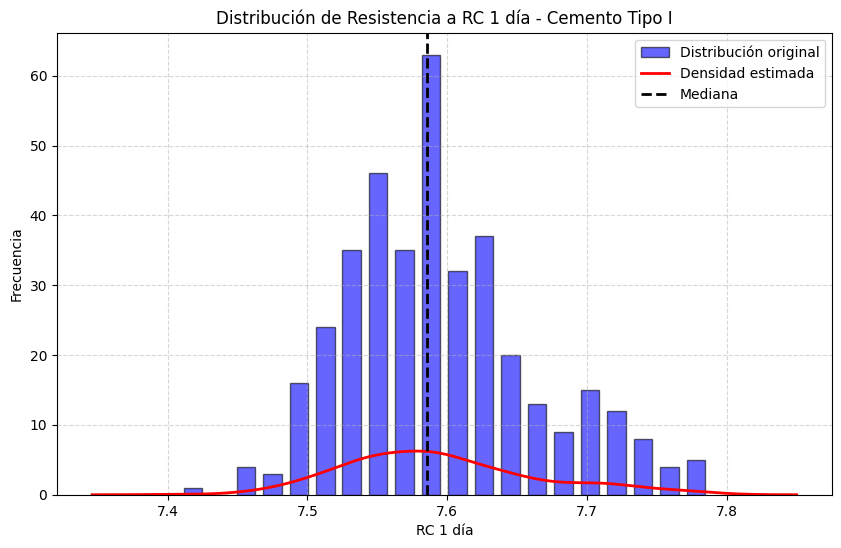

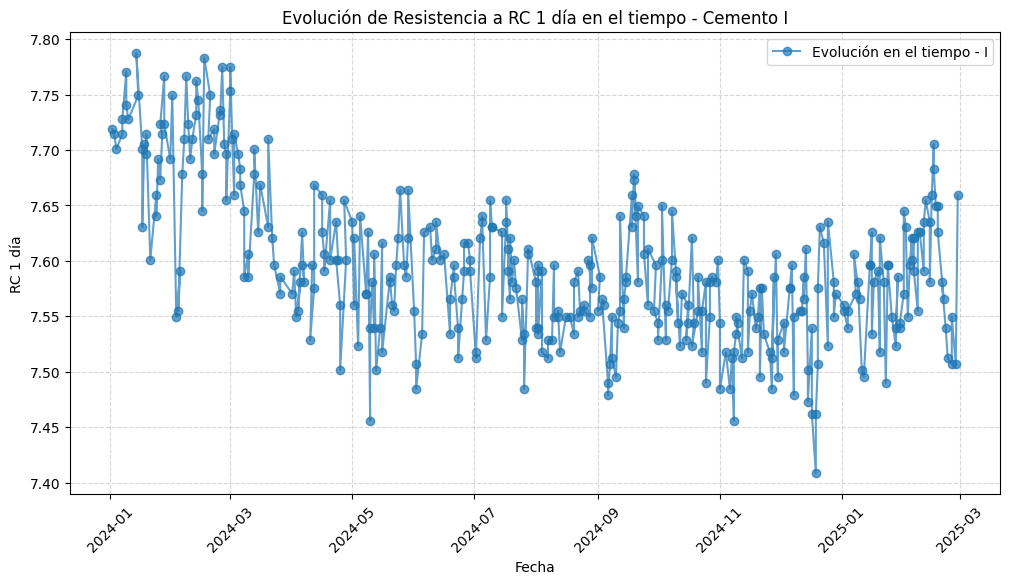

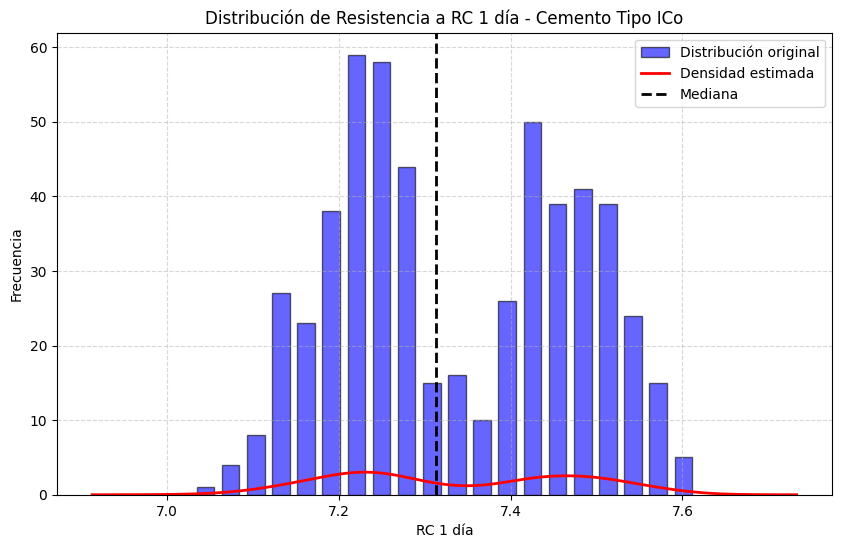

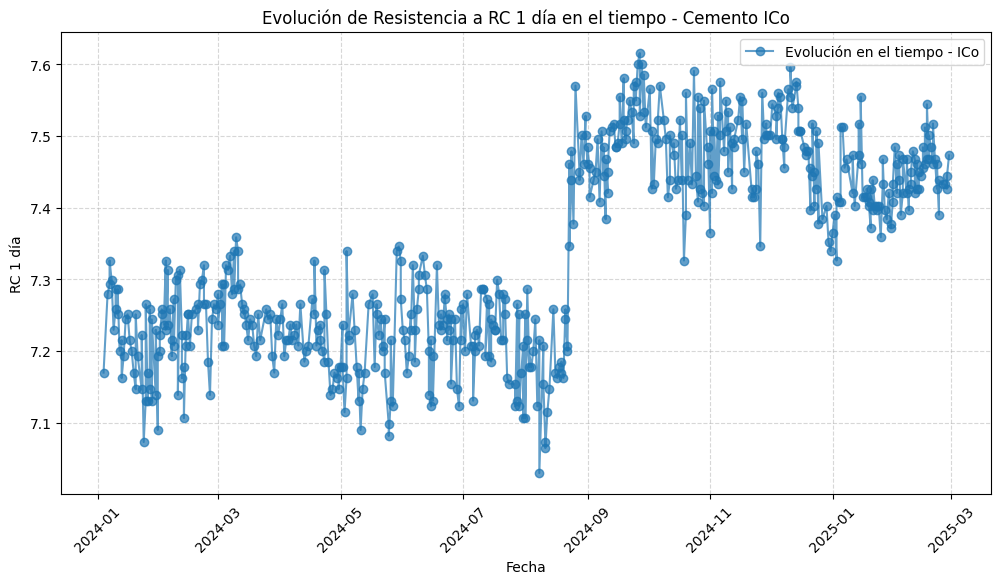

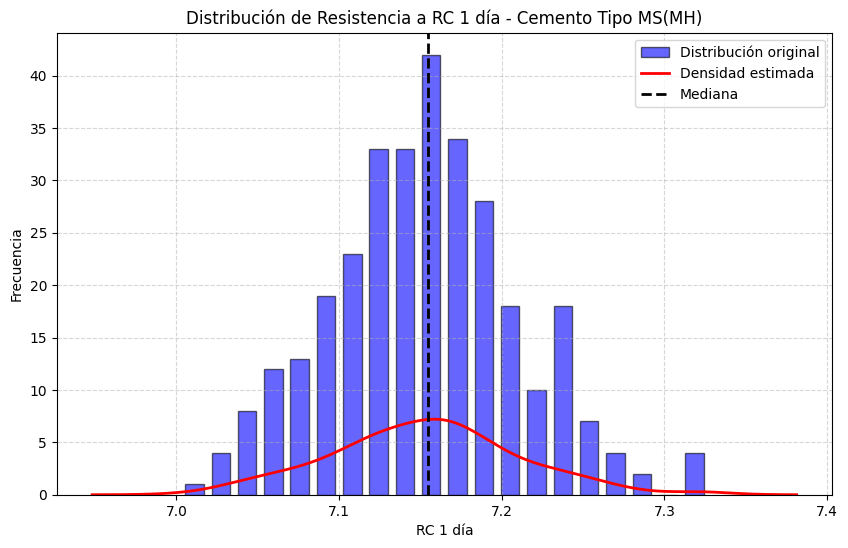

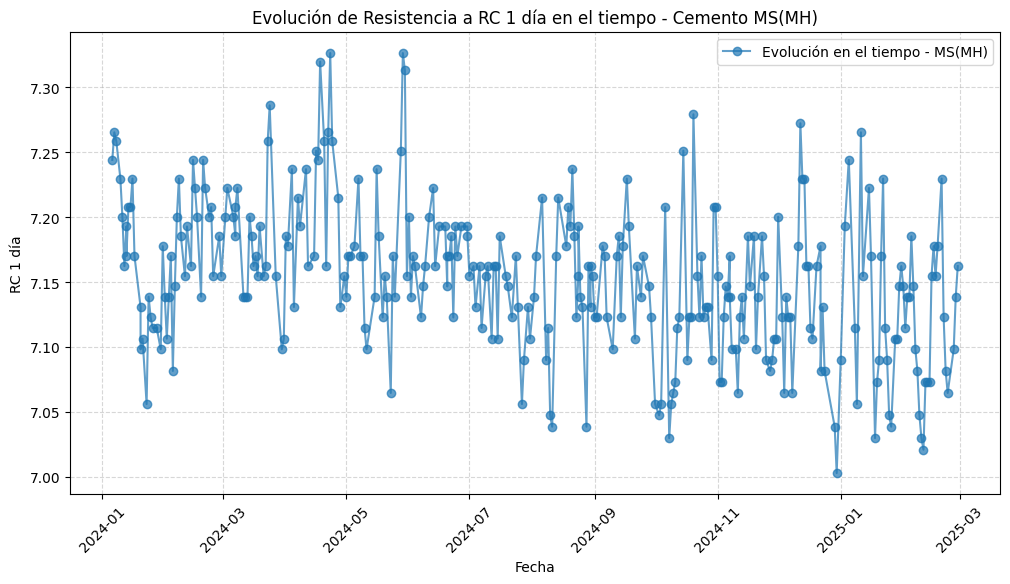

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df1 = data  # Asegúrate de que esta variable contiene el DataFrame con fechas

columna_rcNdias = 'RC 1 día'
columna_fecha = 'FECHAENSAYO'  # Asegúrate de que tu DataFrame tenga una columna de fechas
columna_cemento = 'Tipo_Cemento'

# Convertir la columna de fecha a datetime si aún no lo está
df1[columna_fecha] = pd.to_datetime(df1[columna_fecha])

# Filtrar valores positivos de la resistencia antes de graficar
df1 = df1[df1[columna_rcNdias] > 0]
df1['RC 1 día'] = np.log(df1[columna_rcNdias])

# Generar el histograma con franja de tiempo para cada categoría de cemento
for categoria in df1[columna_cemento].unique():
    sub_df = df1[df1[columna_cemento] == categoria]
    
    plt.figure(figsize=(10, 6))

    # Histograma de resistencia a la compresión
    plt.hist(sub_df[columna_rcNdias], bins=20, color="blue", alpha=0.6, edgecolor="black", rwidth=0.7, label="Distribución original")

    # Agregar una franja de valores por serie de tiempo usando KDE plot
    sns.kdeplot(sub_df[columna_rcNdias], color="red", linewidth=2, label="Densidad estimada")

    # Línea para la mediana de la distribución
    plt.axvline(sub_df[columna_rcNdias].median(), color="black", linestyle="dashed", linewidth=2, label="Mediana")

    plt.title(f"Distribución de Resistencia a {columna_rcNdias} - Cemento Tipo {categoria}")
    plt.xlabel(columna_rcNdias)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

    # 📌 **Gráfico adicional: Evolución de la resistencia en el tiempo**
    plt.figure(figsize=(12, 6))
    plt.plot(sub_df[columna_fecha], sub_df[columna_rcNdias], marker='o', linestyle='-', alpha=0.7, label=f"Evolución en el tiempo - {categoria}")

    plt.title(f"Evolución de Resistencia a {columna_rcNdias} en el tiempo - Cemento {categoria}")
    plt.xlabel("Fecha")
    plt.ylabel(columna_rcNdias)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()

Ahora la distribución luce más Gaussiana

-------------------------------------------------------------------------------
#### **3.2. Evalución de cambios de distribución o estructural de la data**
-------------------------------------------------------------------------------

In [10]:
!pip install ruptures

In [11]:
# Filtrar valores positivos de la resistencia antes de graficar
df1 = df1[df1[columna_rcNdias] > 0]
df1['RC 1 día'] = np.log(df1[columna_rcNdias])


🔹 **Analizando Tipo de Cemento: I**

📌 Resultados de pruebas estadísticas por período:
 🔹 **Comparando 202401 vs 202402**
    KS-Test: p-value = 0.67592
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.93987
    CUSUM: Cambio
 🔹 **Comparando 202402 vs 202403**
    KS-Test: p-value = 0.02391
    Anderson-Darling: p-value = 0.00007
    Mann-Whitney U: p-value = 0.00879
    CUSUM: Cambio
 🔹 **Comparando 202403 vs 202404**
    KS-Test: p-value = 0.00757
    Anderson-Darling: p-value = 0.00001
    Mann-Whitney U: p-value = 0.00055
    CUSUM: Cambio
 🔹 **Comparando 202404 vs 202405**
    KS-Test: p-value = 0.50833
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.27262
    CUSUM: Cambio
 🔹 **Comparando 202405 vs 202406**
    KS-Test: p-value = 0.85812
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.86460
    CUSUM: Cambio
 🔹 **Comparando 202406 vs 202407**
    KS-Test: p-value = 0.39055
    Anderson-Darling: p-value = 0.00

C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value capped: true value larger than 0.25
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])
C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value floored: true value smaller than 0.001
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])


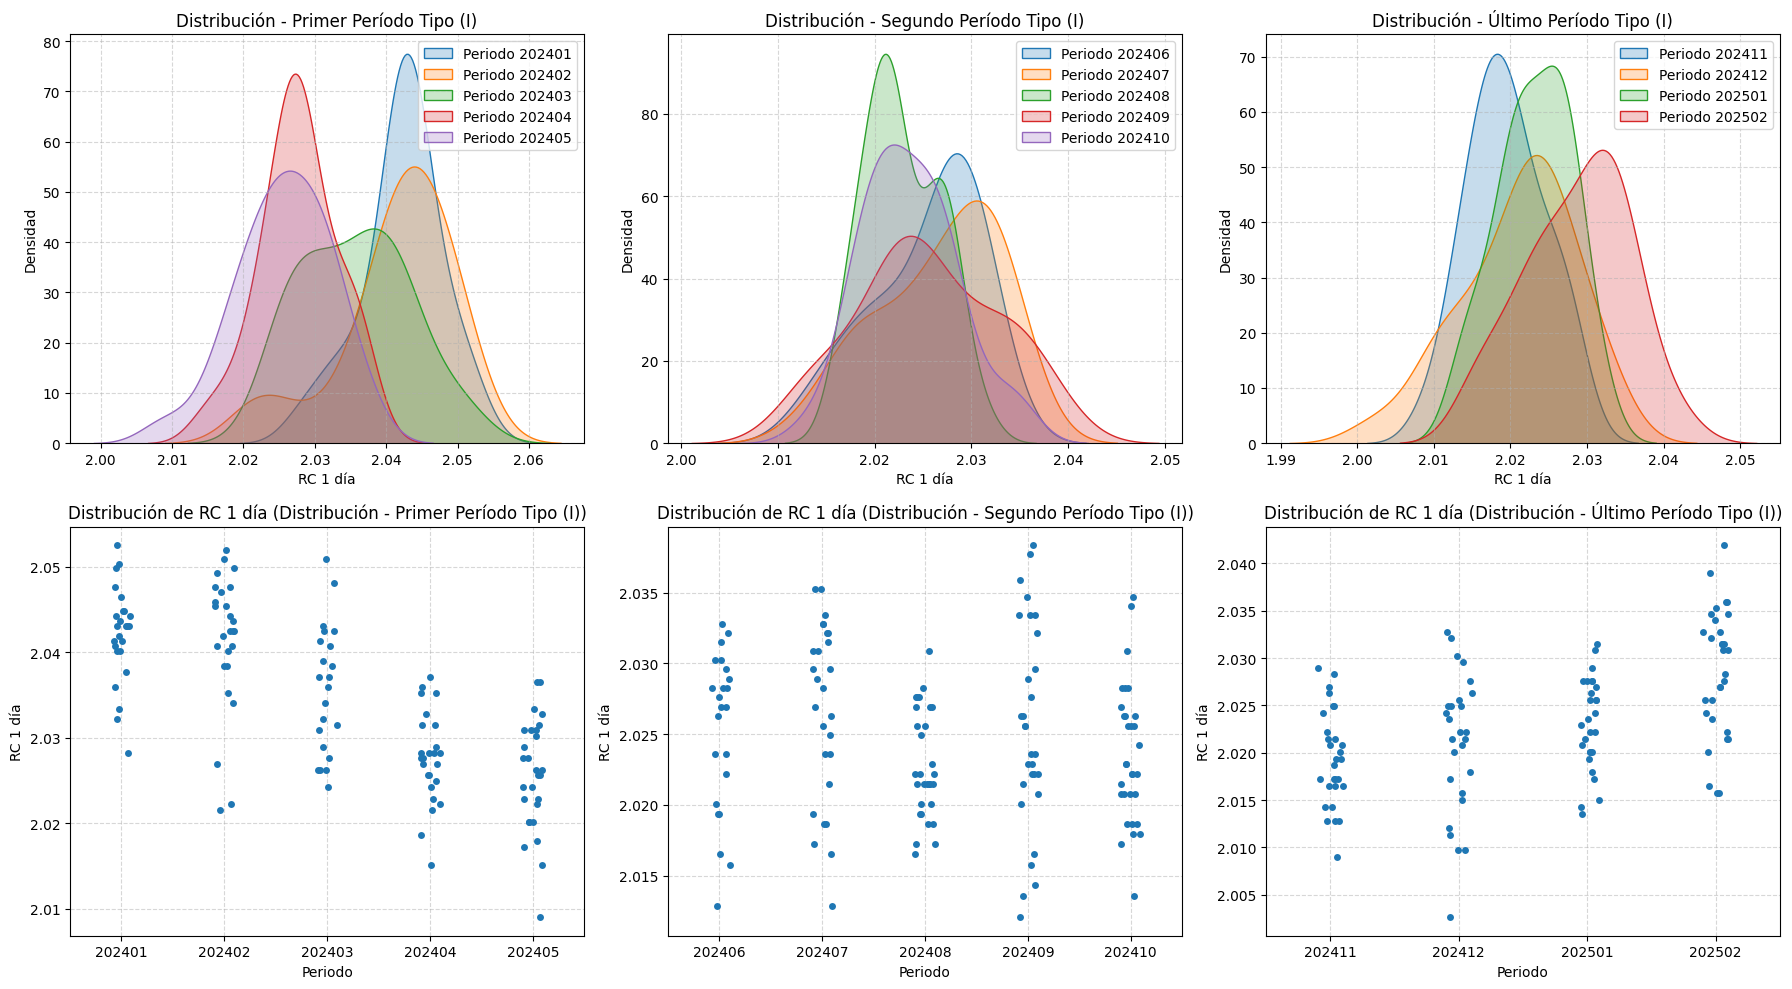


🔹 **Analizando Tipo de Cemento: ICo**


C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value floored: true value smaller than 0.001
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])
C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value capped: true value larger than 0.25
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])



📌 Resultados de pruebas estadísticas por período:
 🔹 **Comparando 202401 vs 202402**
    KS-Test: p-value = 0.05602
    Anderson-Darling: p-value = 0.00023
    Mann-Whitney U: p-value = 0.02093
    CUSUM: Cambio
 🔹 **Comparando 202402 vs 202403**
    KS-Test: p-value = 0.52897
    Anderson-Darling: p-value = 0.00210
    Mann-Whitney U: p-value = 0.17984
    CUSUM: Cambio
 🔹 **Comparando 202403 vs 202404**
    KS-Test: p-value = 0.00515
    Anderson-Darling: p-value = 0.00001
    Mann-Whitney U: p-value = 0.00033
    CUSUM: Cambio
 🔹 **Comparando 202404 vs 202405**
    KS-Test: p-value = 0.17635
    Anderson-Darling: p-value = 0.00128
    Mann-Whitney U: p-value = 0.57148
    CUSUM: Cambio
 🔹 **Comparando 202405 vs 202406**
    KS-Test: p-value = 0.10251
    Anderson-Darling: p-value = 0.00101
    Mann-Whitney U: p-value = 0.14338
    CUSUM: Cambio
 🔹 **Comparando 202406 vs 202407**
    KS-Test: p-value = 0.57860
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.3

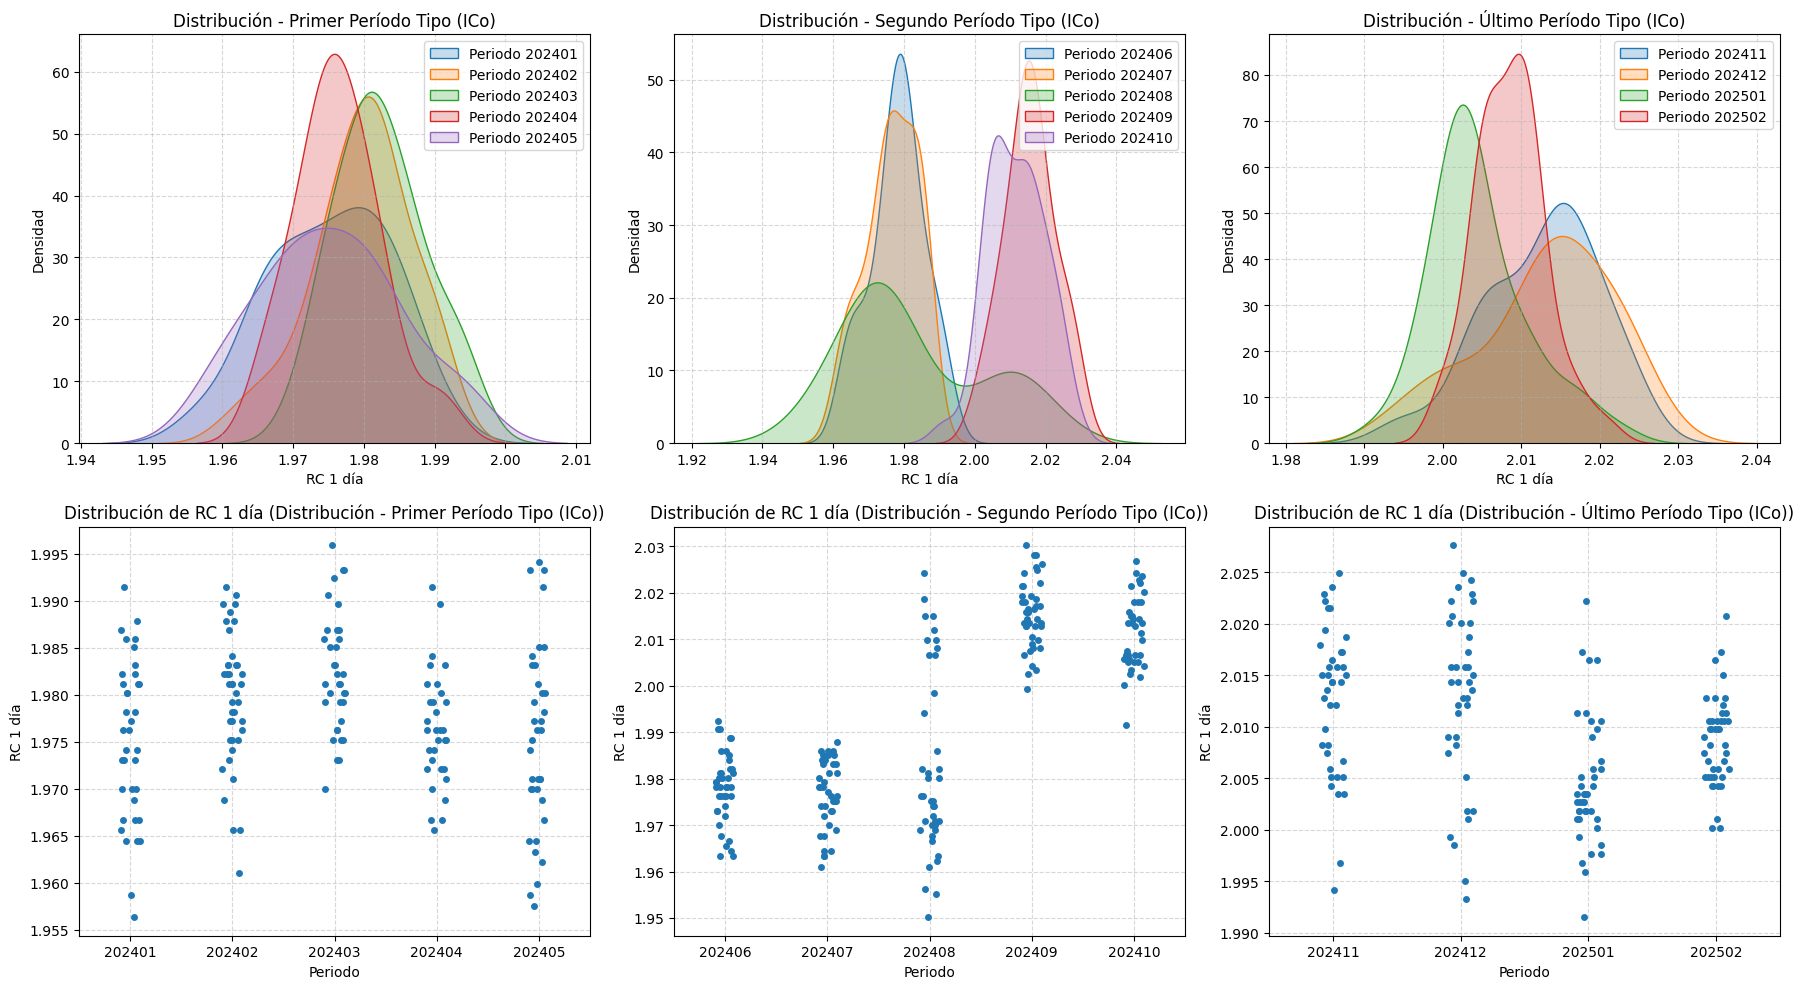


🔹 **Analizando Tipo de Cemento: MS(MH)**

📌 Resultados de pruebas estadísticas por período:
 🔹 **Comparando 202401 vs 202402**
    KS-Test: p-value = 0.30419
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.60094
    CUSUM: Cambio
 🔹 **Comparando 202402 vs 202403**
    KS-Test: p-value = 0.99955
    Anderson-Darling: p-value = 0.00250
    Mann-Whitney U: p-value = 0.96362
    CUSUM: Cambio
 🔹 **Comparando 202403 vs 202404**
    KS-Test: p-value = 0.08560
    Anderson-Darling: p-value = 0.00059
    Mann-Whitney U: p-value = 0.05208
    CUSUM: Cambio
 🔹 **Comparando 202404 vs 202405**
    KS-Test: p-value = 0.06850
    Anderson-Darling: p-value = 0.00025
    Mann-Whitney U: p-value = 0.02307
    CUSUM: Cambio
 🔹 **Comparando 202405 vs 202406**
    KS-Test: p-value = 0.63239
    Anderson-Darling: p-value = 0.00166
    Mann-Whitney U: p-value = 0.40177
    CUSUM: Cambio
 🔹 **Comparando 202406 vs 202407**
    KS-Test: p-value = 0.00148
    Anderson-Darling: p-value =

C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value capped: true value larger than 0.25
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])
C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\212131011.py:55: UserWarning: p-value floored: true value smaller than 0.001
  anderson_result = stats.anderson_ksamp([data_anterior, data_actual])


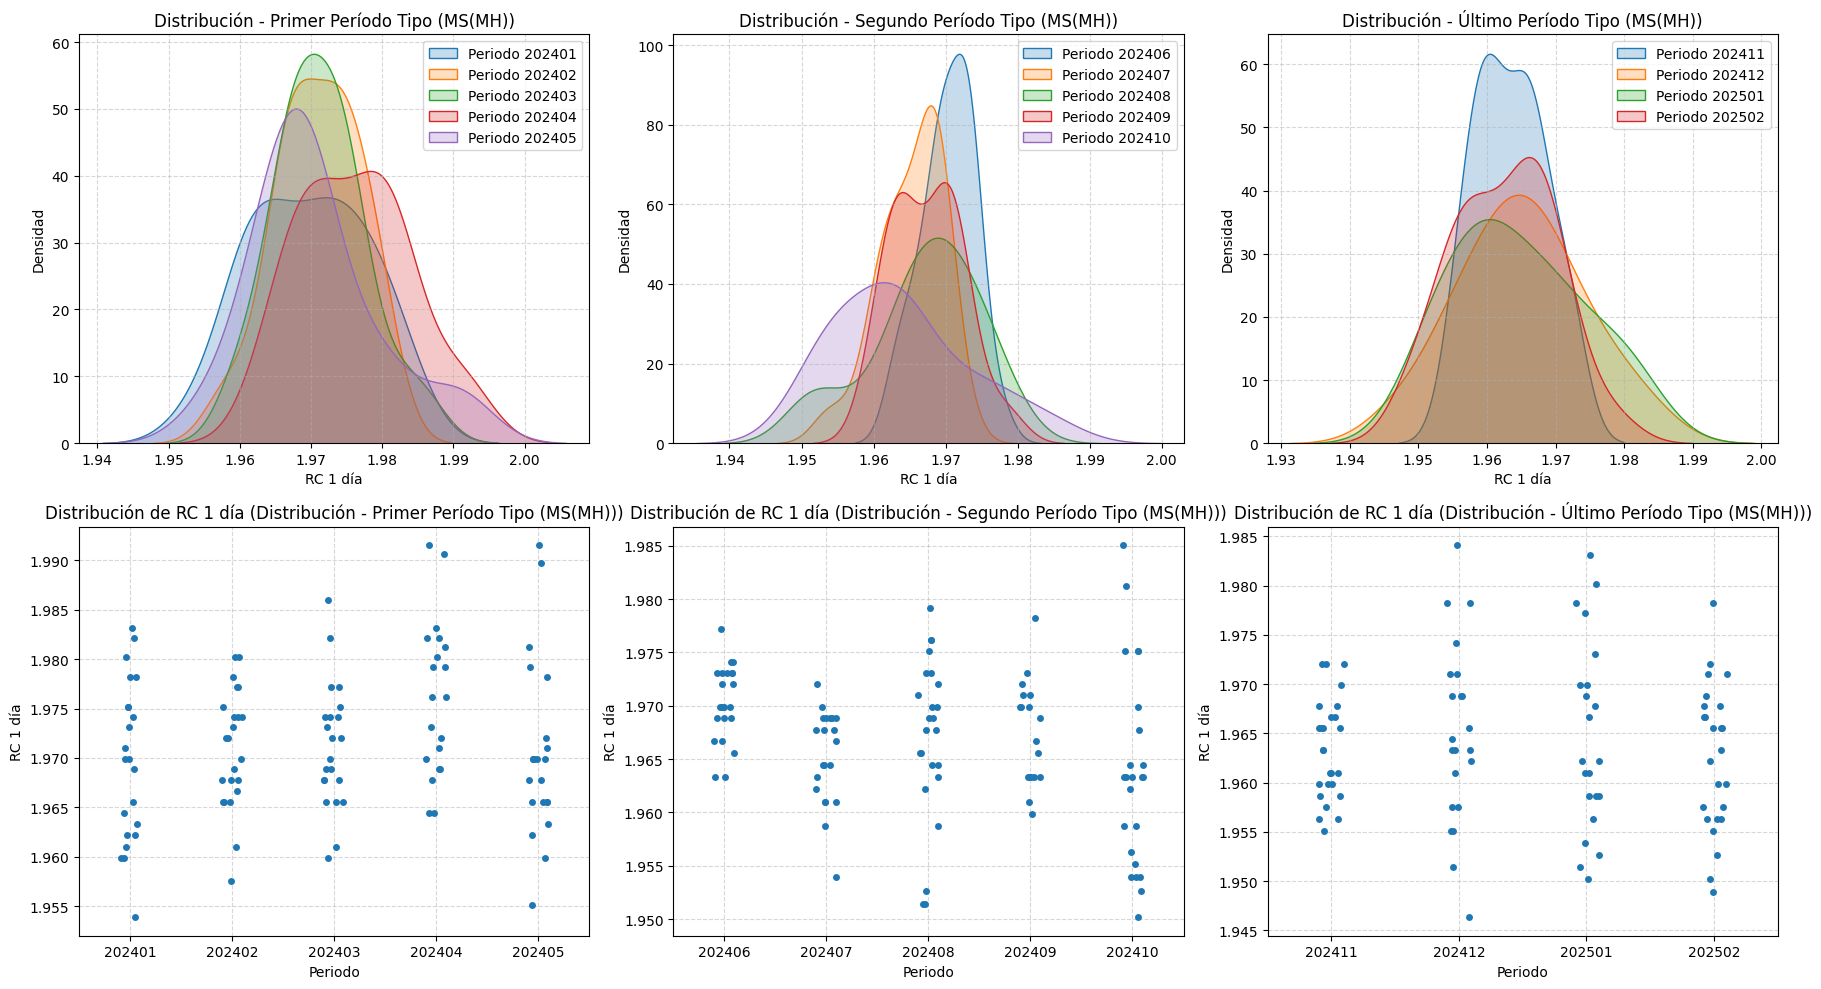

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt  # Para segmentación y detección de rupturas

def detectar_cambios_distribucion(df, variable, periodo_col="Periodo", cemento_col="Tipo_Cemento", alpha=0.05):
    """
    Identifica cambios en la distribución de una variable en distintos períodos usando múltiples pruebas estadísticas.
    
    Se incluyen las pruebas:
    - KS-Test (Kolmogorov-Smirnov)
    - Anderson-Darling
    - Mann-Whitney U
    - CUSUM (Cumulative Sum Control Chart)
    - Ruptures (Detección de rupturas en series temporales)
    
    Se visualiza la evolución con sns.kdeplot y sns.stripplot
    """
    df = df.copy()
    df[periodo_col] = df[periodo_col].astype(int)
    df.sort_values([cemento_col, periodo_col], inplace=True)

    tipos_cemento = df[cemento_col].unique()
    cambios_detectados_por_cemento = {}
    rupturas_detectadas_por_cemento = {}

    for tipo in tipos_cemento:
        print(f"\n🔹 **Analizando Tipo de Cemento: {tipo}**")
        df_tipo = df[df[cemento_col] == tipo]

        periodos = df_tipo[periodo_col].unique()
        cambios_detectados = {"KS-Test": [], "Anderson-Darling": [], "Mann-Whitney U": [], "CUSUM": []}
        pruebas_valores = []

        # 📌 **Pruebas estadísticas para detectar cambios en la distribución**
        for i in range(1, len(periodos)):
            periodo_actual = periodos[i]
            periodo_anterior = periodos[i - 1]

            data_anterior = df_tipo[df_tipo[periodo_col] == periodo_anterior][variable].dropna().values
            data_actual = df_tipo[df_tipo[periodo_col] == periodo_actual][variable].dropna().values

            if len(data_actual) > 10 and len(data_anterior) > 10:  # Evitar pruebas con pocos datos
                pruebas = {}

                # 📍 **Prueba de Kolmogorov-Smirnov (KS-Test)**
                ks_stat, p_ks = stats.ks_2samp(data_anterior, data_actual)
                pruebas["KS-Test"] = p_ks
                if p_ks < alpha:
                    cambios_detectados["KS-Test"].append(periodo_actual)

                # 📍 **Prueba de Anderson-Darling**
                anderson_result = stats.anderson_ksamp([data_anterior, data_actual])
                pruebas["Anderson-Darling"] = anderson_result.significance_level / 100
                if anderson_result.significance_level < alpha * 100:
                    cambios_detectados["Anderson-Darling"].append(periodo_actual)

                # 📍 **Prueba de Mann-Whitney U**
                mw_stat, p_mw = stats.mannwhitneyu(data_anterior, data_actual, alternative='two-sided')
                pruebas["Mann-Whitney U"] = p_mw
                if p_mw < alpha:
                    cambios_detectados["Mann-Whitney U"].append(periodo_actual)
        
                # 📍 **CUSUM (Cumulative Sum Control Chart)**
                diff = np.cumsum(data_actual - np.mean(data_actual))
                threshold = 1.5 * np.std(diff)
                cusum_detected = np.any(np.abs(diff) > threshold)
                pruebas["CUSUM"] = "Cambio" if cusum_detected else "No Cambio"
                if cusum_detected:
                    cambios_detectados["CUSUM"].append(periodo_actual)

                pruebas_valores.append((periodo_anterior, periodo_actual, pruebas))

        cambios_detectados_por_cemento[tipo] = cambios_detectados

        # 📌 **Mostrar resultados de las pruebas de hipótesis**
        print("\n📌 Resultados de pruebas estadísticas por período:")
        for periodo_anterior, periodo_actual, valores in pruebas_valores:
            print(f" 🔹 **Comparando {periodo_anterior} vs {periodo_actual}**")
            for prueba, valor in valores.items():
                print(f"    {prueba}: p-value = {valor:.5f}" if isinstance(valor, float) else f"    {prueba}: {valor}")
               
        # 📌 **Método de rupturas en series temporales (ruptures)**
        signal = df_tipo.groupby(periodo_col)[variable].mean().values.reshape(-1, 1)
        if len(signal) < 5:
            print("⚠️ Advertencia: Datos insuficientes para detectar cambios con ruptures.")
            rupturas_detectadas_por_cemento[tipo] = []
            continue

        model = rpt.Binseg(model="l2").fit(signal)
        n_breakpoints = min(3, max(1, len(signal) // 3))
        try:
            cambios_ruptures = model.predict(n_bkps=n_breakpoints)
        except rpt.exceptions.BadSegmentationParameters:
            print("⚠️ No se detectaron cambios significativos en ruptures.")
            cambios_ruptures = []

        rupturas_detectadas_por_cemento[tipo] = cambios_ruptures

        # 📊 **Gráficos combinados con sns.kdeplot y sns.stripplot**
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        periodos_split = np.array_split(periodos, 3)

        for idx, (subset, ax1, ax2, title) in enumerate(zip(periodos_split, axes[0], axes[1], 
                                                       [f"Distribución - Primer Período Tipo ({tipo})",
                                                        f"Distribución - Segundo Período Tipo ({tipo})",
                                                        f"Distribución - Último Período Tipo ({tipo})"])):
            for periodo in subset:
                sns.kdeplot(df_tipo[df_tipo[periodo_col] == periodo][variable], label=f"Periodo {periodo}", ax=ax1, fill=True)
            ax1.set_title(title)
            ax1.set_xlabel(variable)
            ax1.set_ylabel("Densidad")
            ax1.legend()
            ax1.grid(True, linestyle="--", alpha=0.5)
            
            sns.stripplot(data=df_tipo[df_tipo[periodo_col].isin(subset)], x=periodo_col, y=variable, jitter=True, ax=ax2)
            ax2.set_title(f"Distribución de {variable} ({title})")
            ax2.set_xlabel("Periodo")
            ax2.set_ylabel(variable)
            ax2.grid(True, linestyle="--", alpha=0.5)

        plt.tight_layout()
        plt.show()

    return cambios_detectados_por_cemento, rupturas_detectadas_por_cemento

# **Ejemplo de uso**
df = df1 # Tu dataset con datos históricos
variable = 'RC 1 día'  # Nombre de la variable a analizar
cambios, rupturas = detectar_cambios_distribucion(df, variable)

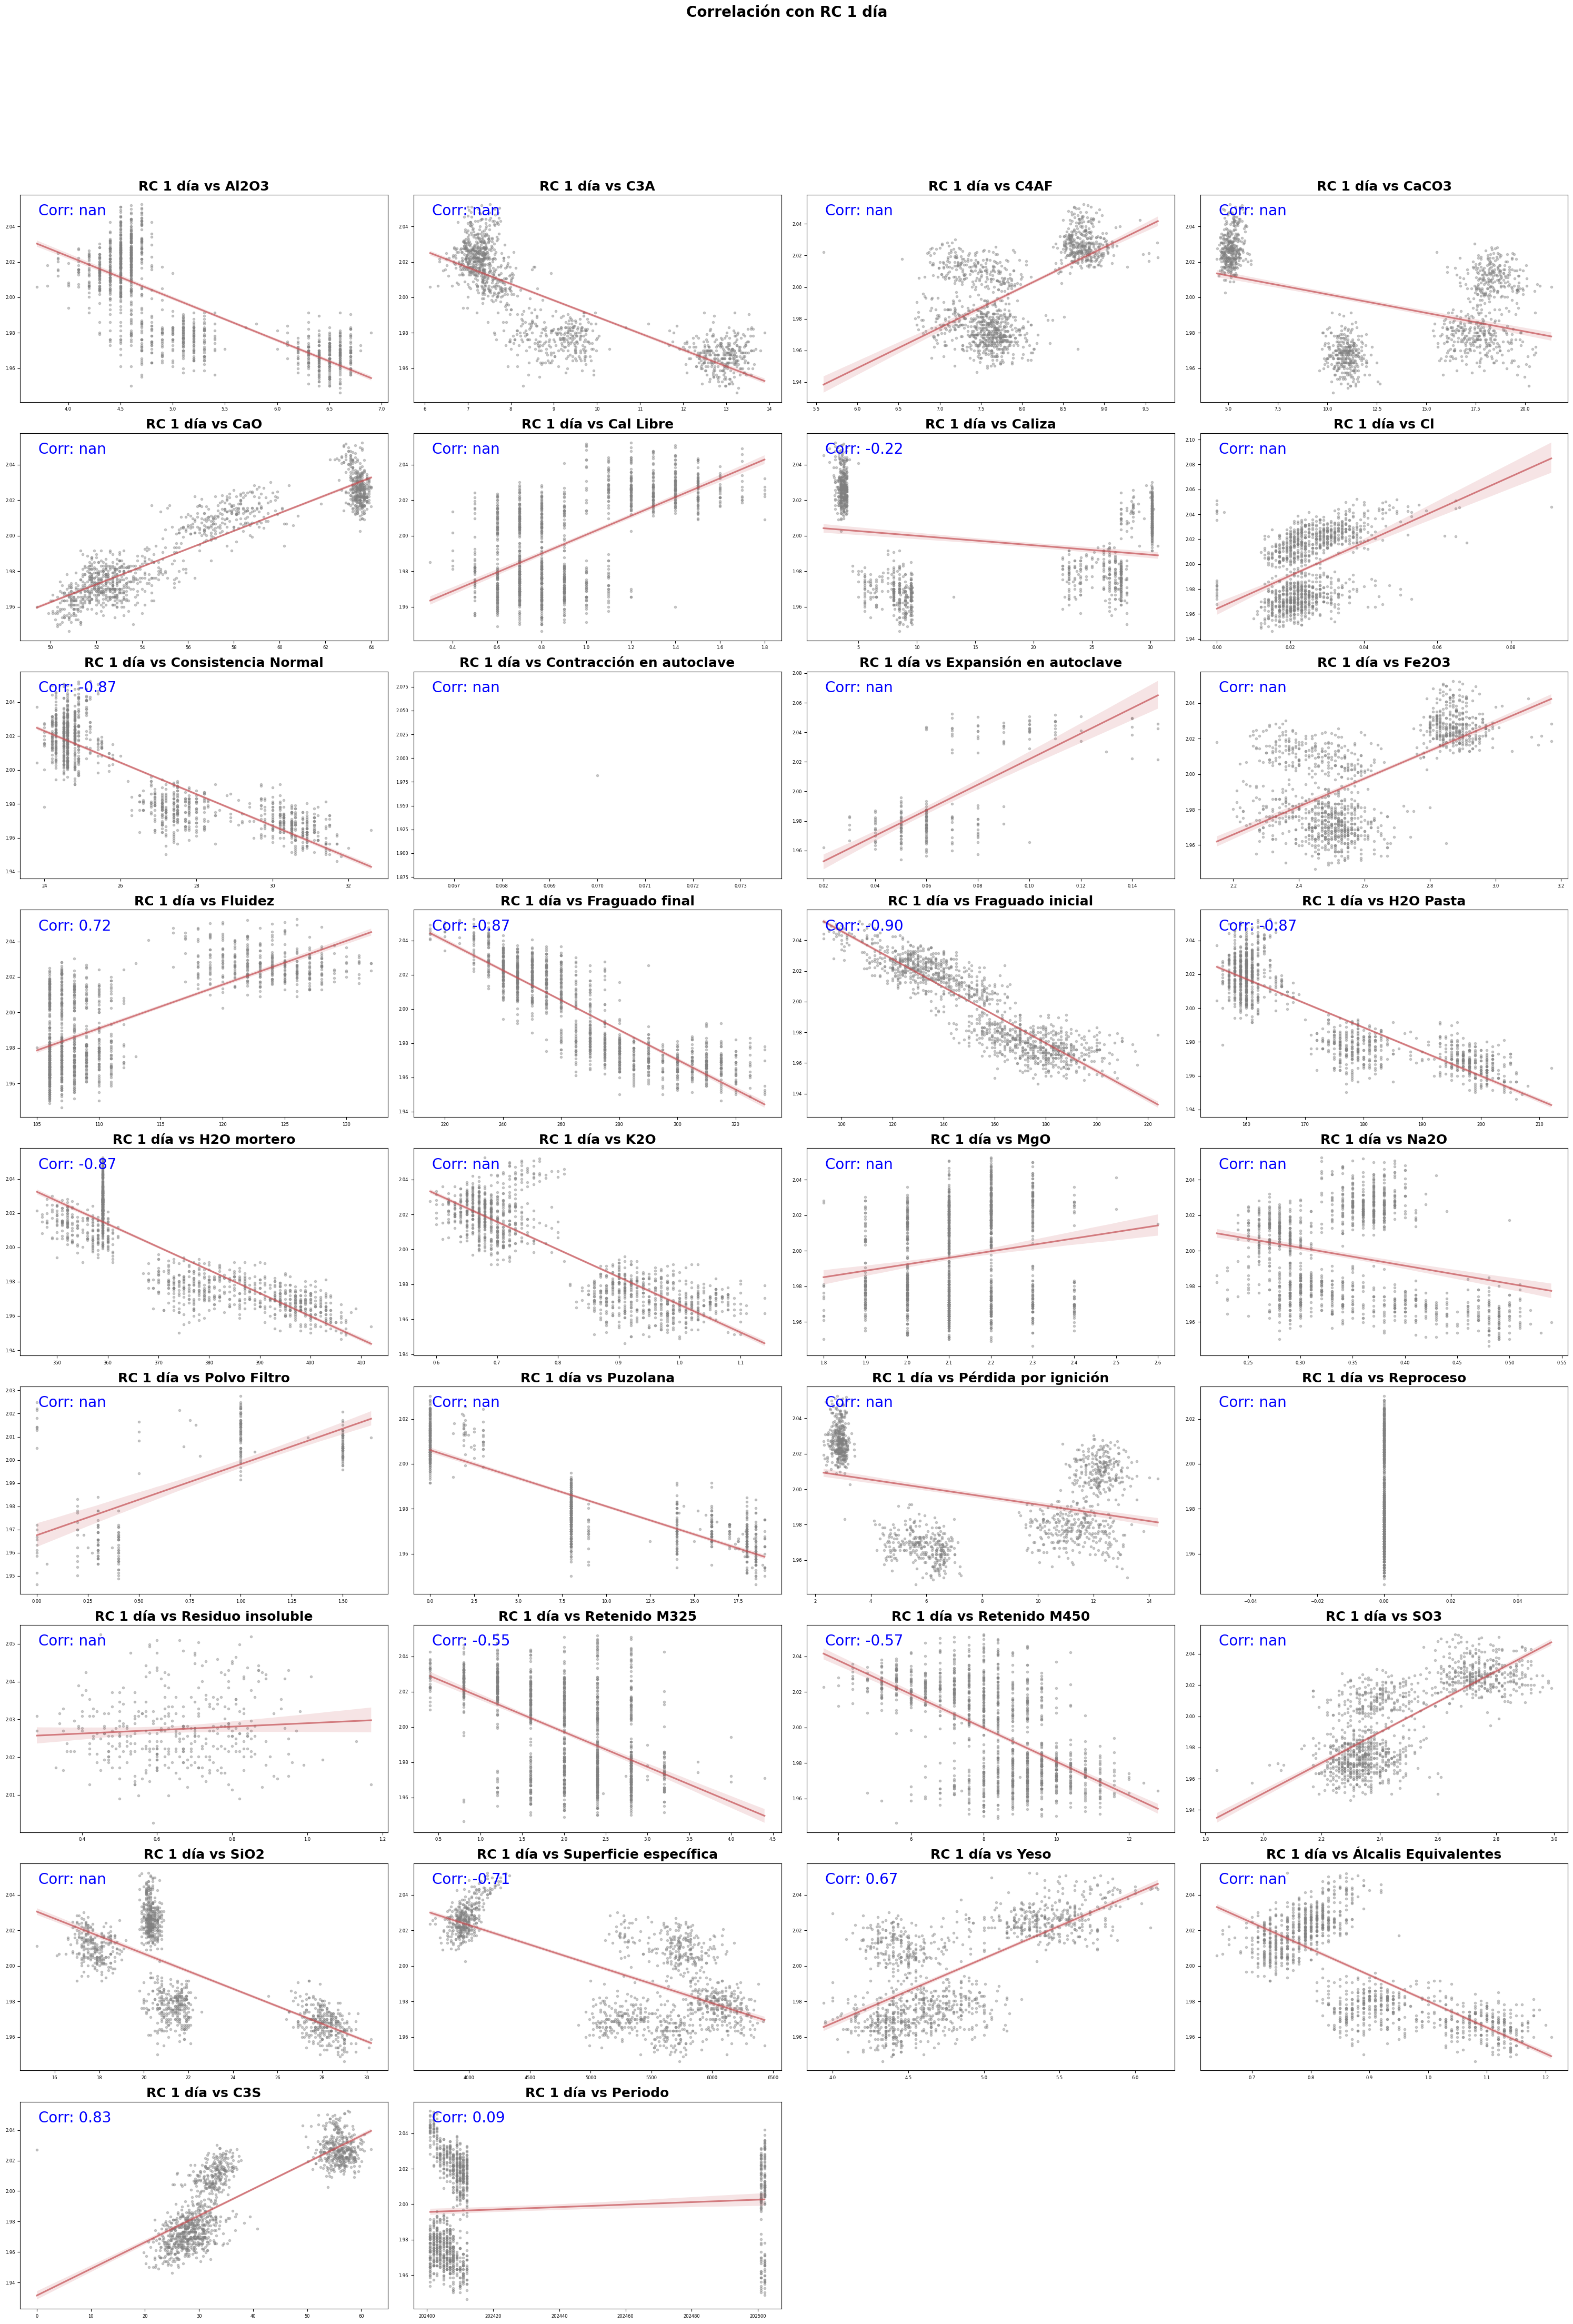

In [13]:
# Dataset de ejemplo (df_data)
datasetSO = pd.DataFrame(df1)

n = datasetSO.shape[1]
col = 4
f = int(round(n / col))  # Cantidad de filas

VALOR_LABORATORIO = 'RC 1 día'  # Ajusta según la columna que desees

# Seleccionar las variables numéricas del dataset
dataset_gs = datasetSO.copy()  
dataset_gs[VALOR_LABORATORIO] = datasetSO[VALOR_LABORATORIO]

# Crear la figura con el número adecuado de subgráficos
fig, axes = plt.subplots(nrows=f, ncols=col, figsize=(30, 45))
axes = axes.flat  # Aplana el arreglo de ejes

# Seleccionar las columnas numéricas
columnas_numeric = dataset_gs.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(VALOR_LABORATORIO)  # Eliminar columna del laboratorio

# Función para calcular y agregar la correlación en cada gráfico
def add_correlation(ax, x, y):
    correlation = np.corrcoef(x, y)[0, 1]  # Calcula el coeficiente de correlación de Pearson
    ax.annotate(f'Corr: {correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=20, color='blue')

# Loop para crear los gráficos de dispersión con la línea de regresión
for i, colum in enumerate(columnas_numeric):
    if i < len(axes):  # Asegura que no haya más gráficos que subgráficos
        sns.regplot(
            x=dataset_gs[colum],
            y=dataset_gs[VALOR_LABORATORIO],
            color="gray",
            marker='.',
            scatter_kws={"alpha": 0.4},
            line_kws={"color": "r", "alpha": 0.7},
            ax=axes[i]
        )

        # Agregar título y ajustar ejes
        axes[i].set_title(f"{VALOR_LABORATORIO} vs {colum}", fontsize=18, fontweight="bold")
        axes[i].tick_params(labelsize=6)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

        # Llamar a la función para agregar el valor de correlación
        add_correlation(axes[i], dataset_gs[colum], dataset_gs[VALOR_LABORATORIO])

# Eliminar ejes vacíos si es necesario
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle(f'Correlación con {VALOR_LABORATORIO}', fontsize=20, fontweight="bold")

# Mostrar la figura
plt.show()


#### Variable Types

A continuación, identifiquemos las variables categóricas y numéricas.

In [35]:
# # identifiquemos las variables categóricas
# # capturaremos aquellas de tipo *object*

# cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# # MSSubClass también es categórica por definición, a pesar de sus valores numéricos

# # Adicionamos MSSubClass a la lista de categorical variables
# cat_vars = cat_vars + ['MSSubClass']

# # agreguemos MSSubClass a la lista de variables categóricas
# len(cat_vars)

In [36]:
# # Convertir todas las variables a categóricas
# data[cat_vars] = data[cat_vars].astype('O')

In [37]:
# # ahora identifiquemos las variables numéricas

# num_vars = [
#     var for var in data.columns if var not in cat_vars and var != 'SalePrice'
# ]

# # Numero de Variables Categóricas
# len(num_vars)

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **IV. Tratamiento de Datos**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------------------------------
#### **3.1. Eliminación de variables de baja variabilidad e Imputación de valores nulls**
------------------------------------------------------------------------------------

Let's go ahead and find out which variables of the dataset contain missing values.

In [14]:
# Hacemos una lista de las variables que contienen Missing Values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determina el porcentaje de missing values (expresado en decimales)
# y muestra el resultado ordenado por % de Missing Data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Contracción en autoclave    0.999192
Expansión en autoclave      0.830234
Polvo Filtro                0.802749
Residuo insoluble           0.691997
Reproceso                   0.308812
Puzolana                    0.308812
Al2O3                       0.000808
Na2O                        0.000808
SiO2                        0.000808
SO3                         0.000808
Pérdida por ignición        0.000808
K2O                         0.000808
MgO                         0.000808
C3A                         0.000808
Fe2O3                       0.000808
Cl                          0.000808
Cal Libre                   0.000808
CaO                         0.000808
CaCO3                       0.000808
C4AF                        0.000808
Álcalis Equivalentes        0.000808
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

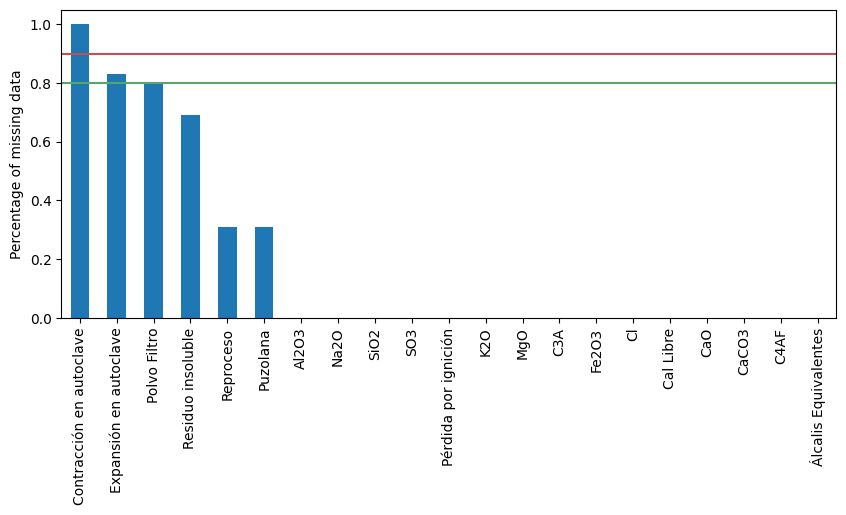

In [15]:
# plot

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [40]:
# # Ahora podemos determinar cuáles variables, de aquellas con datos faltantes,
# # son numéricas y cuáles son categóricas

# cat_na = [var for var in cat_vars if var in vars_with_na]
# num_na = [var for var in num_vars if var in vars_with_na]

# print('Numero de Variables Categóricas con na: ', len(cat_na))
# print('Numero de Variables Numéricas con na: ', len(num_na))

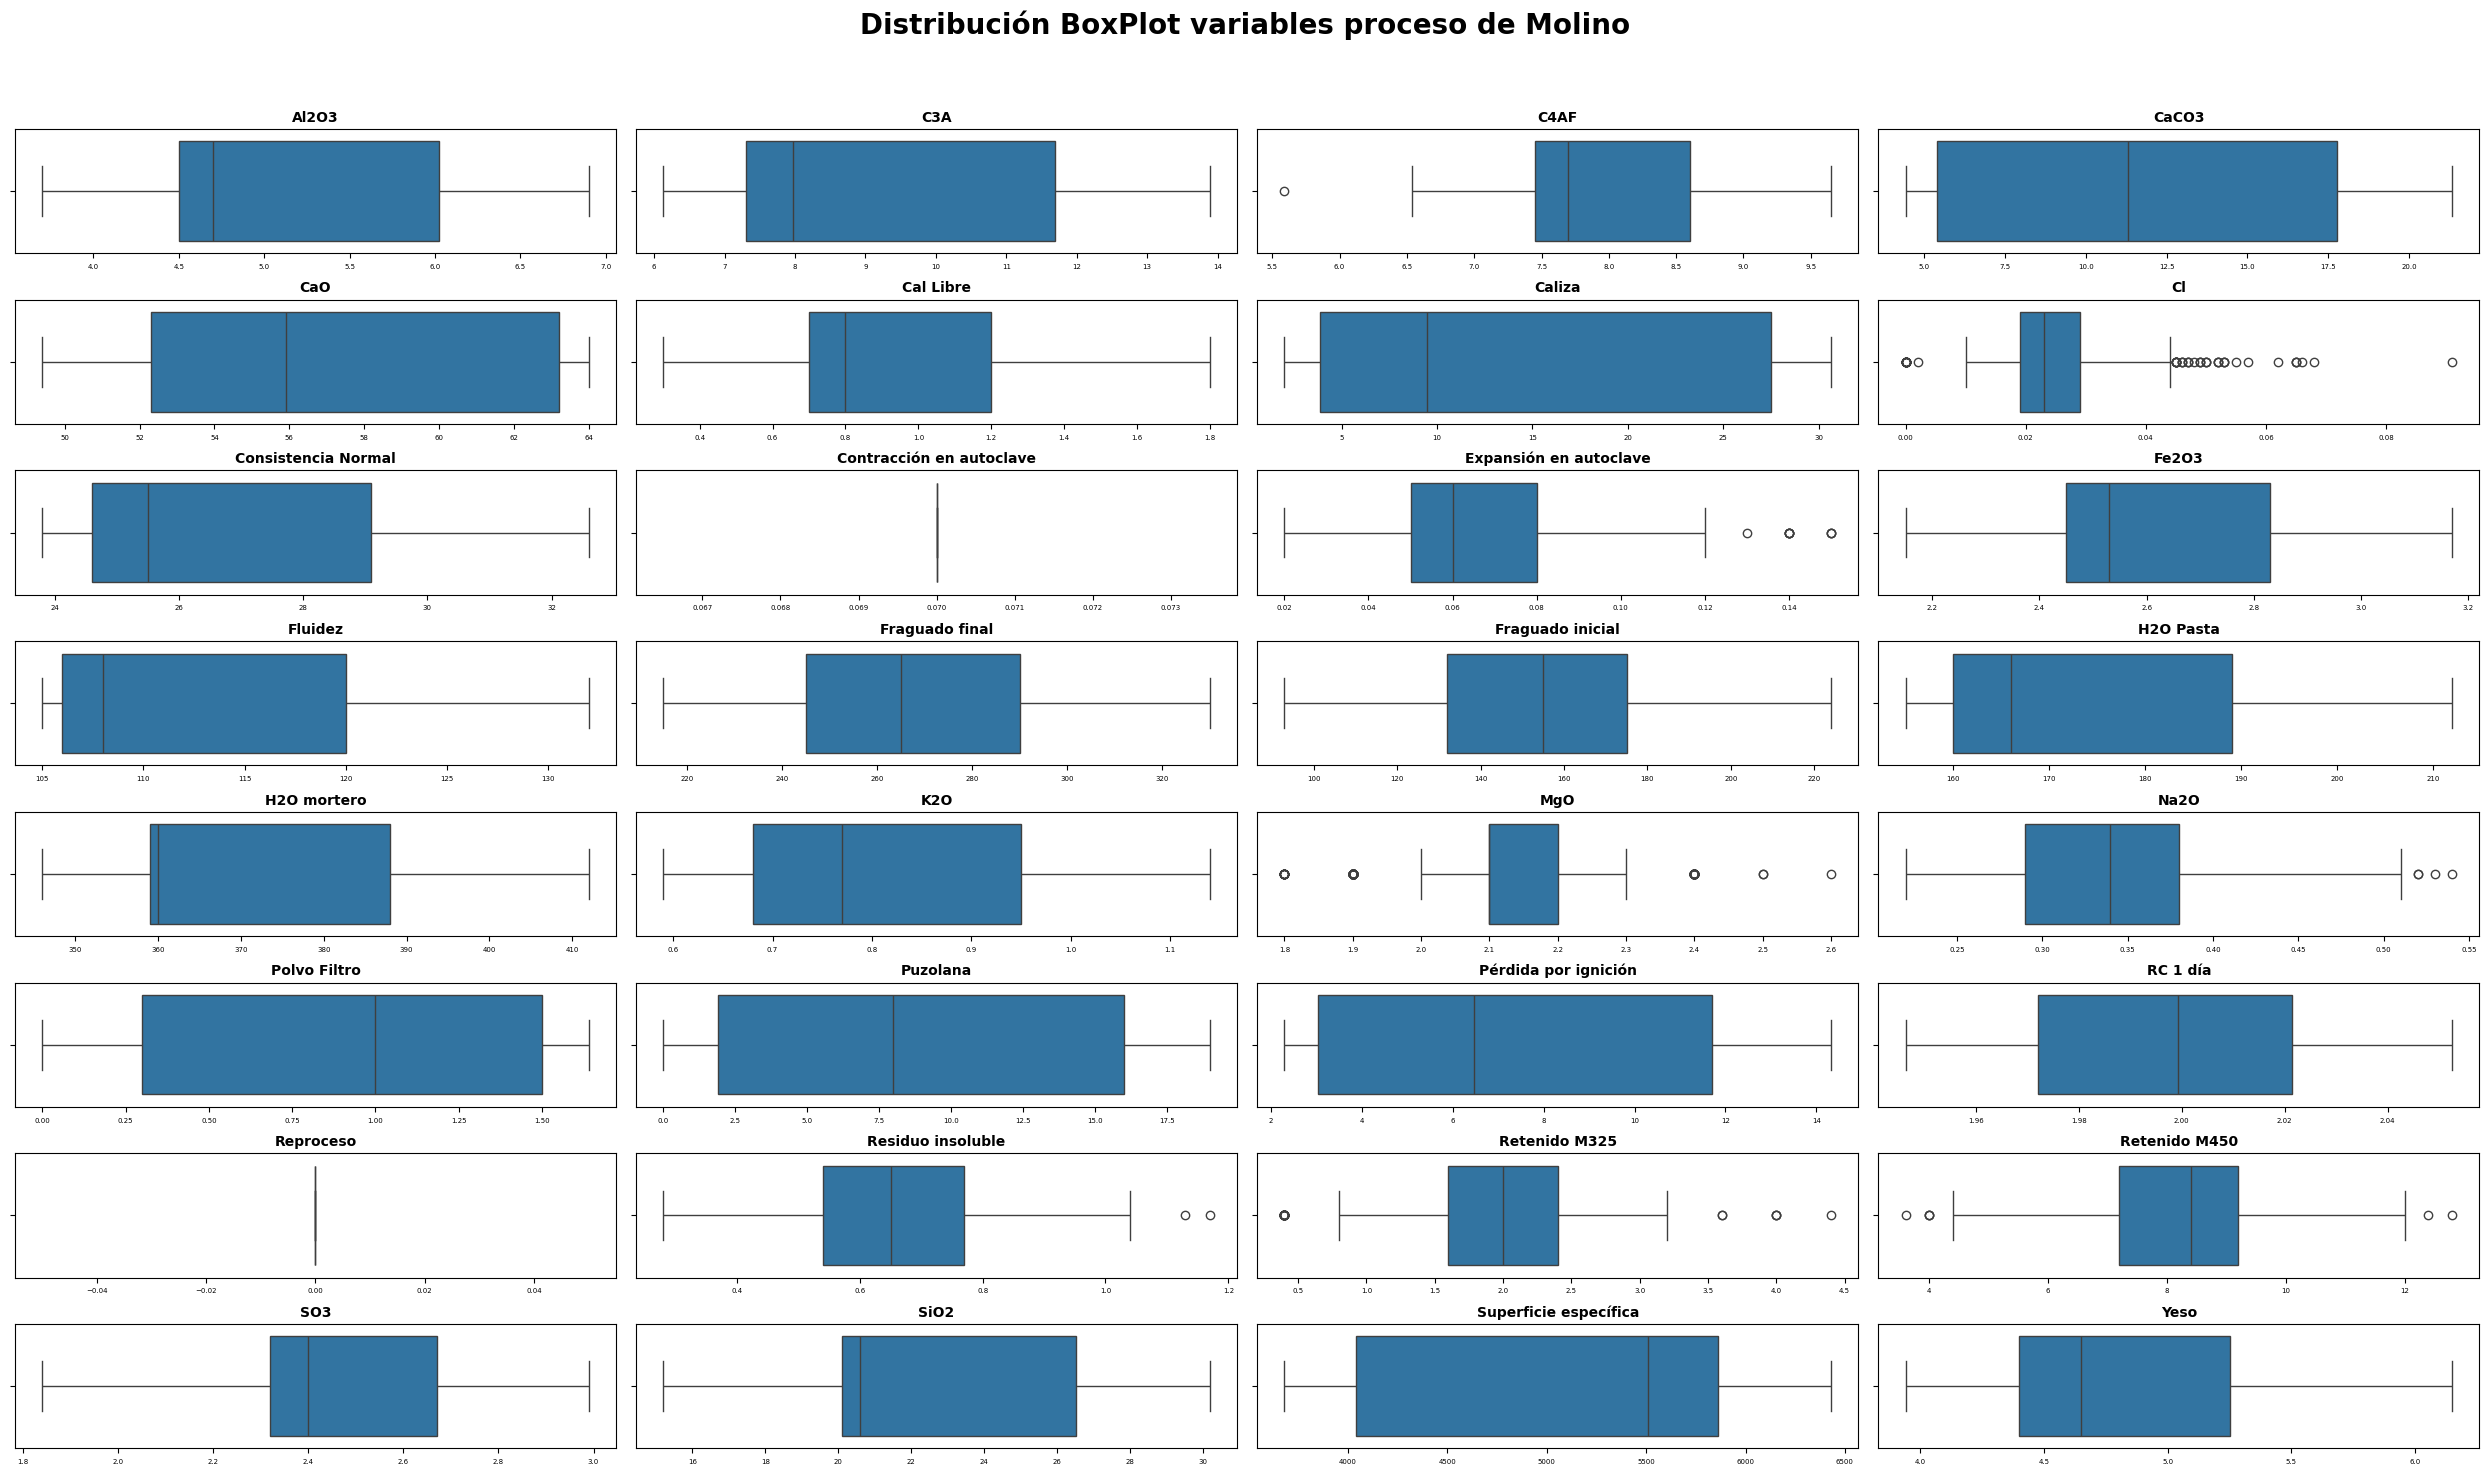

In [16]:
# Crear un DataFrame de ejemplo
df_data = df.copy()
columns_var = df_data.select_dtypes(include=[np.number]).columns
columns_var = columns_var.drop('Periodo')

# dataset_g01 = pd.DataFrame(df_data)
# dato_new_numeric = dataset_g01.iloc[:, 1:]

dato_new_numeric = df_data[columns_var]

# Calcular la cantidad de subgráficos
ncols = 4  # Número de filas de subgráficos
f = int(round( columns_var.shape[0]/ ncols))

# Crear subgráficos
fig, axes = plt.subplots(nrows=f, ncols=ncols, figsize=(25, 15))
axes = axes.flat  # Aplana el arreglo de ejes

# Seleccionar solo las columnas numéricas
columnas_numeric = dato_new_numeric.select_dtypes(include=['float64', 'int']).columns

# Crear un gráfico boxplot para cada columna numérica
for i, colum in enumerate(columnas_numeric):
    if i < len(axes):  # Asegúrate de que no haya más subgráficos de los necesarios
        sns.boxplot(
            data=dato_new_numeric,
            x=colum,
            ax=axes[i]
        )
        axes[i].set_title(colum, fontsize=10, fontweight="bold")
        axes[i].tick_params(labelsize=5)
        axes[i].set_xlabel("")  # Quitar etiqueta del eje x para mejorar la legibilidad

# Ajuste de los subgráficos
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución BoxPlot variables proceso de Molino', fontsize=20, fontweight="bold")
plt.show()

------------------------------------------------------------------------------------
#### **3.2. Relación entre los Missing Values y la Resistencia a 1 día**
------------------------------------------------------------------------------------
Evaluemos el precio de la casa en aquellas observaciones donde falta información. Haremos esto para cada variable que muestre datos faltantes.

In [17]:
def analyse_na_value(df, var):

    # copiamos el dataframe, para no sobrescribir los datos originales
    # consulte el enlace para más detalles sobre pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # hagamos una variable intermedia que indique 1 si la
    # observación estaba faltante o 0 en caso contrario
    df[var] = np.where(df[var].isnull(), 1, 0)

    # comparemos el precio de venta medio en las observaciones donde faltan datos
    # vs las observaciones donde los datos están disponibles

    # determinamos el precio medio en los grupos 1 y 0,
    # y la desviación estándar del precio de venta,
    # y capturamos los resultados en un dataset temporal
    tmp = df.groupby(var)['RC 1 día'].agg(['mean', 'std'])

    # Plotear en un gráfico de barras
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="RC 1 día", color='green')

    plt.show()

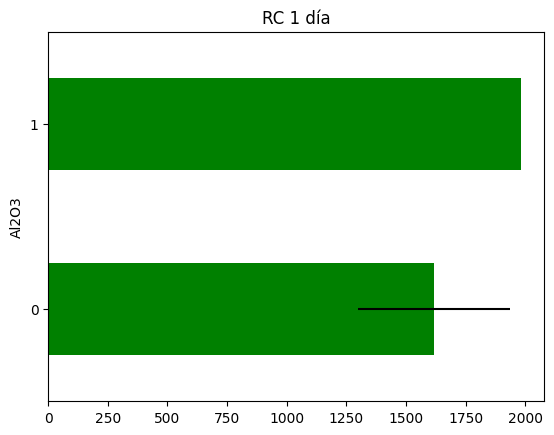

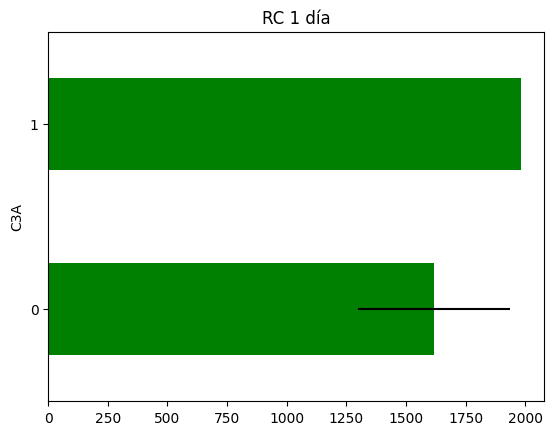

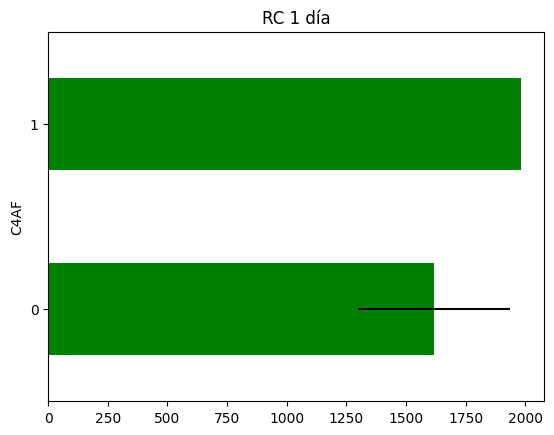

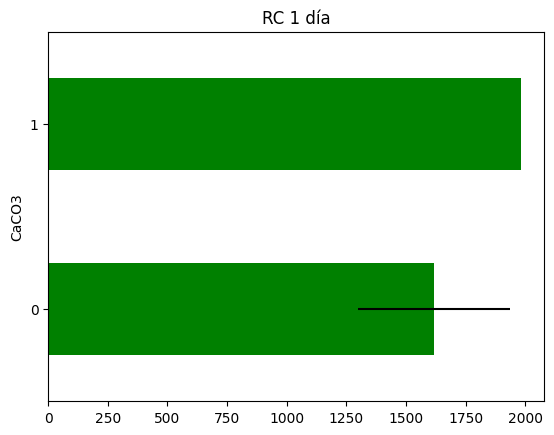

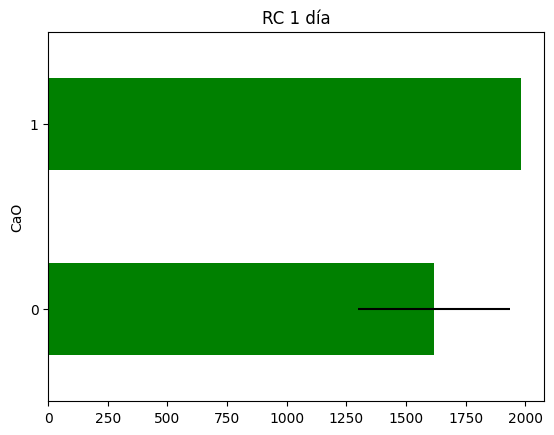

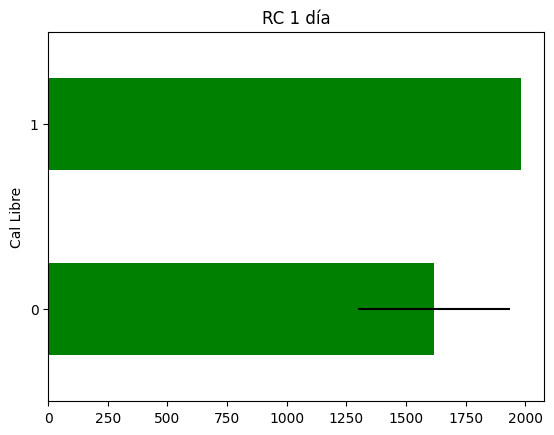

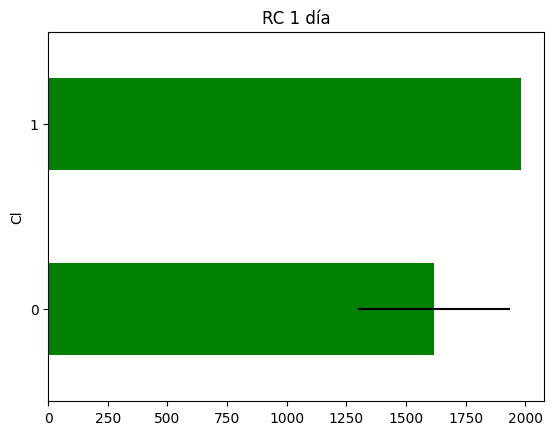

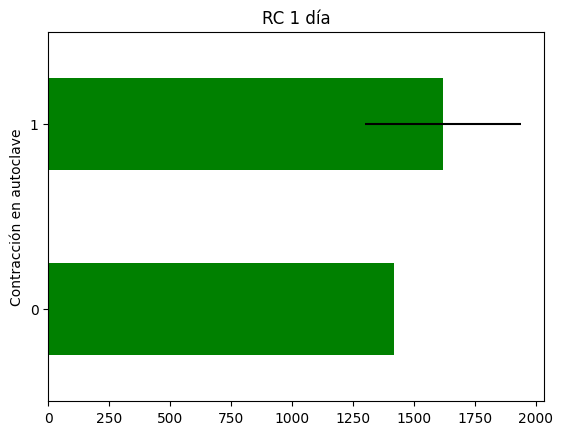

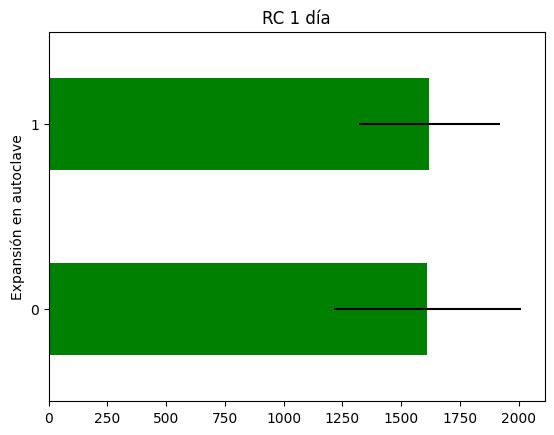

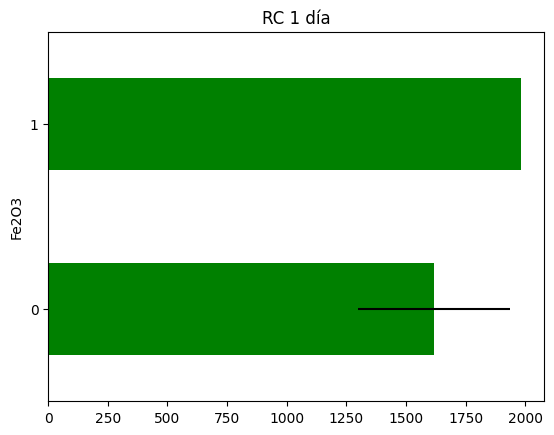

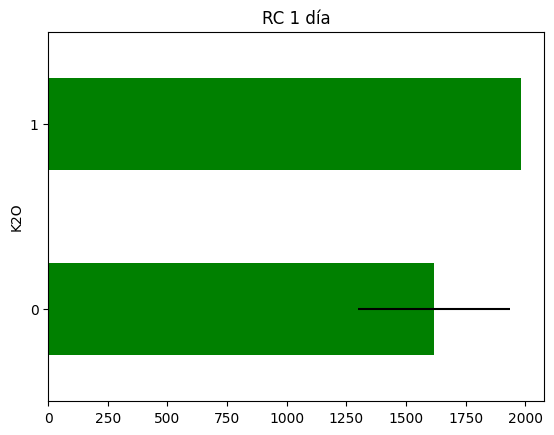

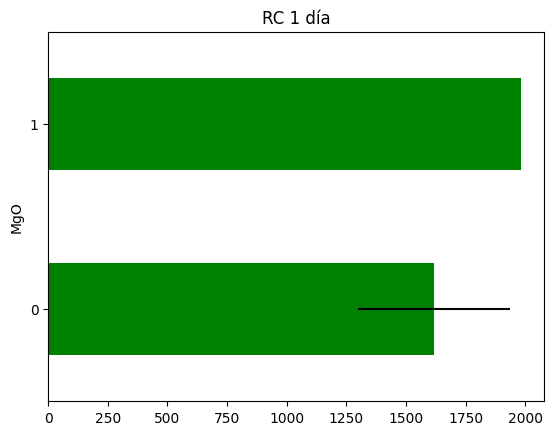

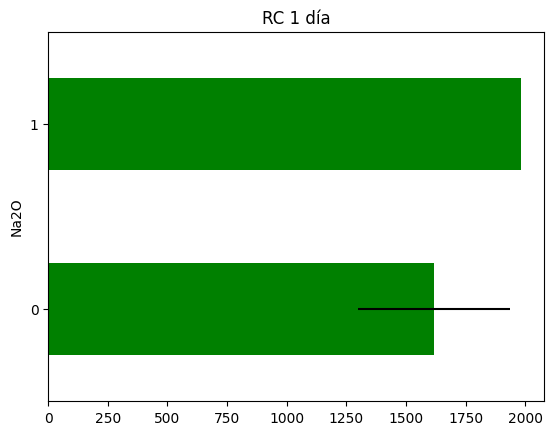

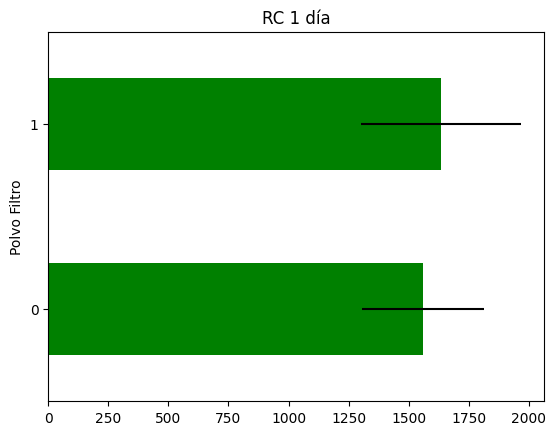

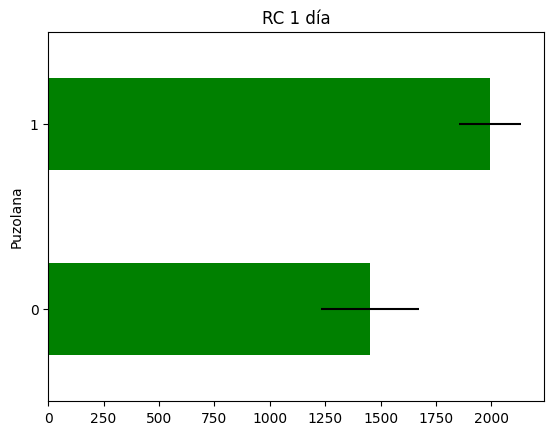

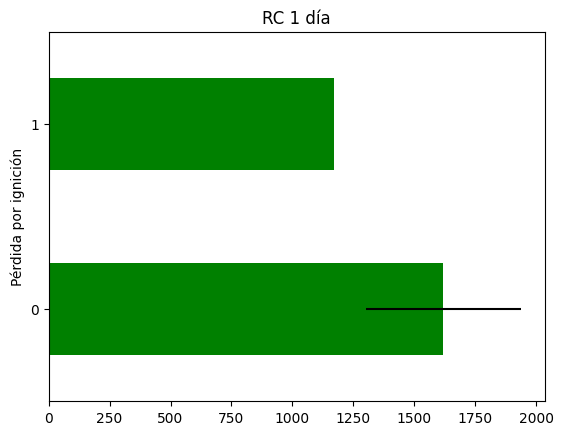

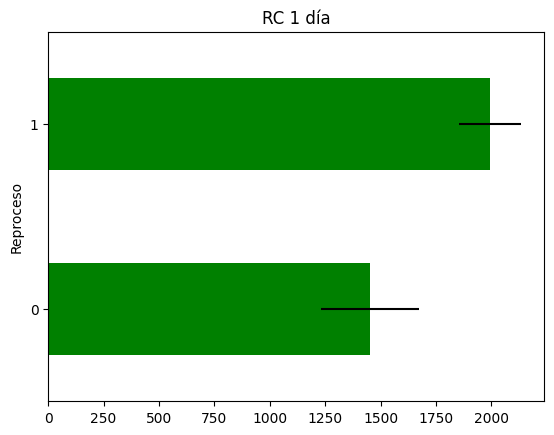

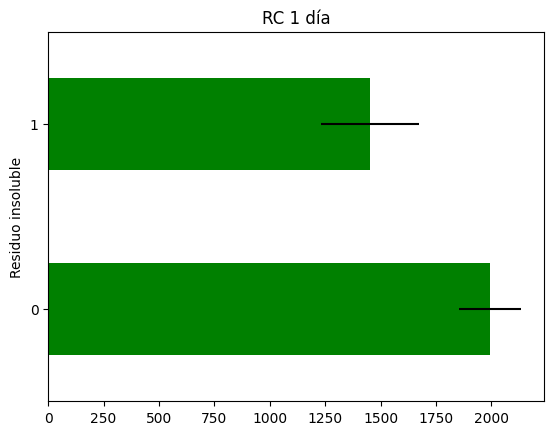

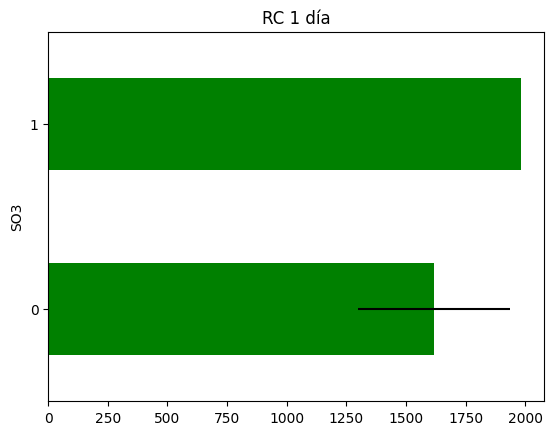

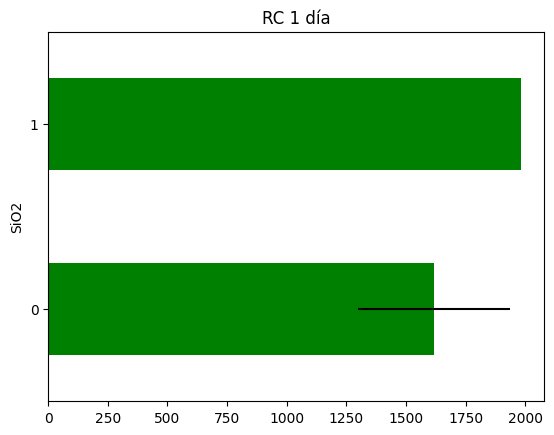

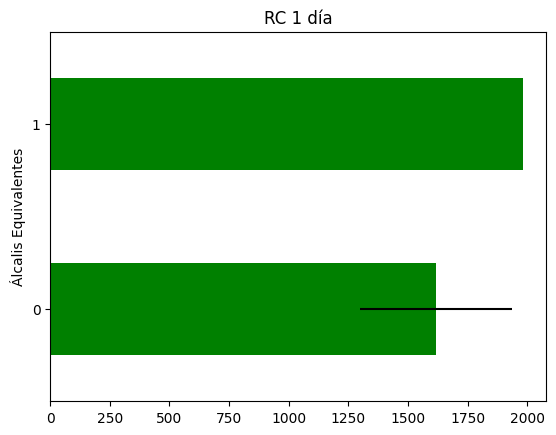

In [18]:
# ejecutemos la función en cada variable con datos faltantes

for var in vars_with_na:
    analyse_na_value(data, var)

En algunas variables, el precio de venta promedio en casas donde falta la información difiere del precio de venta promedio en casas donde existe la información. Esto sugiere que la falta de datos podría ser un buen predictor del precio de venta.

#### Numerical variables

Vamos a identificar qué variables numéricas tenemos en el conjunto de datos.

In [43]:
# print('Number of numerical variables: ', len(num_vars))

# # visualise the numerical variables
# data[num_vars].head()

In [19]:
#----------------------------------------------------------------------------------------
# 2.1 Identificación de valores nulos
#----------------------------------------------------------------------------------------
dfsinnull = data.copy()
print(dfsinnull.isnull().sum())

#----------------------------------------------------------------------------------------
# 2.2 Definir un umbral del 30% para eliminar columnas con muchos valores nulos
#----------------------------------------------------------------------------------------
threshold = 0.99  # Umbral del 30%
dfsinnull = dfsinnull.loc[:, dfsinnull.isnull().mean() < threshold]

#----------------------------------------------------------------------------------------
# 2.3 Imputación de valores nulos según la variable
#----------------------------------------------------------------------------------------
for column in dfsinnull.columns:
    if dfsinnull[column].isnull().sum() > 0:
        if dfsinnull[column].dtype == 'object':  # Para variables categóricas
            dfsinnull[column].fillna(dfsinnull[column].mode()[0], inplace=True)  # Imputación con la moda
        else:
            # Prueba con diferentes métodos de imputación
            dfsinnull[column].fillna(0, inplace=True)  # Imputación con la media
            #dfsinnull[column].fillna(dfsinnull[column].mean(), inplace=True)  # Imputación con la media

FECHAENSAYO                    0
Al2O3                          1
C3A                            1
C4AF                           1
CaCO3                          1
CaO                            1
Cal Libre                      1
Caliza                         0
Cl                             1
Consistencia Normal            0
Contracción en autoclave    1236
Expansión en autoclave      1027
Fe2O3                          1
Fluidez                        0
Fraguado final                 0
Fraguado inicial               0
H2O Pasta                      0
H2O mortero                    0
K2O                            1
MgO                            1
Na2O                           1
Polvo Filtro                 993
Puzolana                     382
Pérdida por ignición           1
RC 1 día                       0
Reproceso                    382
Residuo insoluble            856
Retenido M325                  0
Retenido M450                  0
SO3                            1
SiO2      

C:\Users\enriq\AppData\Local\Temp\ipykernel_22052\2953486249.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfsinnull[column].fillna(0, inplace=True)  # Imputación con la media


In [20]:
columnas_eliminadas = set(data) - set(dfsinnull.columns)
print("Columnas eliminadas:", columnas_eliminadas)

Columnas eliminadas: {'Contracción en autoclave'}


------------------------------------------------------------------------------------
#### **3.3. Temporal variables**
------------------------------------------------------------------------------------

Tenemos 4 variables de año en el conjunto de datos:

- YearBuilt: año en que la casa fue construida
- YearRemodAdd: año en que la casa fue remodelada
- GarageYrBlt: año en que se construyó un garaje
- YrSold: año en que la casa fue vendida

Generalmente, no usamos variables de fecha en su formato bruto. En su lugar, extraemos información de ellas. Por ejemplo, podemos capturar la diferencia en años entre el año en que la casa fue construida y el año en que la casa fue vendida.

In [ ]:
# # list of variables that contain year information
# year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
# year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [98]:
# # let's explore the values of these temporal variables

# for var in year_vars:
#     print(var, data[var].unique())
#     print()

Como esperábamos, los valores son años.

Podemos explorar la evolucion del Precio de Venta (sale price) con los años en el cual la casa fue vendida (sold):

In [21]:
df1 = dfsinnull  # Asegúrate de que esta variable contiene el DataFrame con fechas

columna_rcNdias = 'RC 1 día'
columna_fecha = 'FECHAENSAYO'  # Asegúrate de que tu DataFrame tenga una columna de fechas
columna_cemento = 'Tipo_Cemento'

Text(0, 0.5, 'Median RC 1 día')

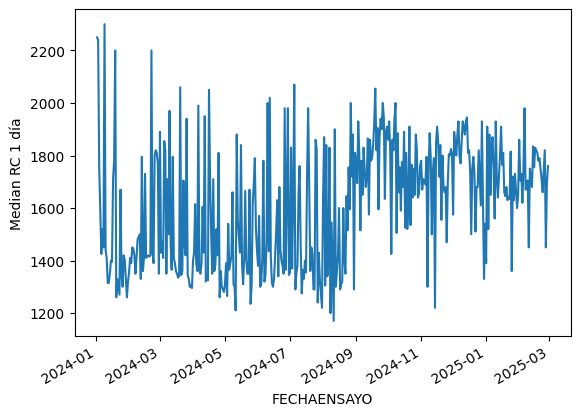

In [22]:
# plot median sale price vs year in which it was sold

dfsinnull.groupby('FECHAENSAYO')['RC 1 día'].median().plot()
plt.ylabel('Median RC 1 día')

Ha habido una caída en el valor de las casas. Eso es inusual, en la vida real, los precios de las casas típicamente suben con el paso de los años.

Exploremos un poco más.

Grafiquemos el precio de venta vs el año en que fue construida.

Podemos ver que las casas recién construidas / más jóvenes tienden a ser más caras.

¿Podría ser que últimamente se han vendido casas más antiguas? Vamos a echar un vistazo a eso.

Para esto, capturaremos los años transcurridos entre las variables de Año y el año en que la casa fue vendida:

In [52]:
# # list of variables that contain year information
# year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
# year_vars

In [ ]:
# def analyse_year_vars(df, var):

#     df = df.copy()

#     # capture difference between a year variable and year
#     # in which the house was sold
#     df[var] = df['FECHAENSAYO'] - df[var]

#     df.groupby('FECHAENSAYO')[var].median().plot()
#     plt.ylabel('Time from ' + var)
#     plt.show()


# for var in year_vars:
#     if var !='FECHAENSAYO':
#         analyse_year_vars(data, var)

In [ ]:
# def analyse_year_vars(df, var):

#     df = df.copy()

#     # capture difference between a year variable and year
#     # in which the house was sold
#     df[var] = df['FECHAENSAYO'] - df[var]

#     plt.scatter(df[var], df['RC 1 día'])
#     plt.ylabel('RC 1 día')
#     plt.xlabel(var)
#     plt.show()


# for var in year_vars:
#     if var !='FECHAENSAYO':
#         analyse_year_vars(data, var)

A partir de las gráficas, vemos que hacia el 2010, las casas vendidas tenían garajes más antiguos y no habían sido remodeladas recientemente, lo que podría explicar por qué vemos precios de venta más bajos en los últimos años, al menos en este conjunto de datos.

Ahora podemos graficar el tiempo desde la última remodelación o el tiempo desde la construcción, y el precio de venta, para ver si hay una relación.

In [71]:
# def analyse_year_vars(df, var):

#     df = df.copy()

#     # capture difference between a year variable and year
#     # in which the house was sold
#     df[var] = df['YrSold'] - df[var]

#     plt.scatter(df[var], df['SalePrice'])
#     plt.ylabel('SalePrice')
#     plt.xlabel(var)
#     plt.show()


# for var in year_vars:
#     if var !='YrSold':
#         analyse_year_vars(data, var)

Vemos que hay una tendencia a una disminución en el precio con las casas más antiguas. En otras palabras, cuanto más tiempo haya entre la construcción o remodelación de la casa y la fecha de venta, menor será el precio de venta.

Lo cual tiene sentido, ya que esto significa que la casa tendrá una apariencia más antigua y potencialmente necesitará reparaciones.

------------------------------------------------------------------------------------
#### **3.3.1. Discrete variables**
------------------------------------------------------------------------------------

Vamos a identificar cuáles variables son discretas, es decir, muestran un número finito de valores.

In [72]:
# # hagamos una lista de variables discretas
# discrete_vars = [var for var in num_vars if len(
#     data[var].unique()) < 20 and var not in year_vars]


# print('Numero de Variables Discretas: ', len(discrete_vars))

In [73]:
# # Visualizamos las Variables Discretas

# data[discrete_vars].head()

Estas variables discretas tienden a ser calificaciones (Qual) o escalas de evaluación (Cond), o se refieren al número de habitaciones, o unidades (FullBath, GarageCars), o indican el área de la habitación (KitchenAbvGr).

Esperamos precios más altos con números más grandes.

Vamos a analizar su contribución al precio de la casa.

MoSold es el mes en que la casa fue vendida.

In [74]:
# for var in discrete_vars:
#     # make boxplot with Catplot
#     sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
#     plt.show()

Para la mayoría de las variables numéricas discretas, vemos un aumento en el precio de venta con la calidad, la condición general, el número de habitaciones o la superficie.

Para algunas variables, no vemos esta tendencia. Es probable que esa variable no sea un buen predictor del precio de venta.

------------------------------------------------------------------------------------
#### **3.3.2. Continuous variables**
------------------------------------------------------------------------------------
Vamos a encontrar la distribución de las variables continuas. Consideraremos como variables continuas todas aquellas que no son temporales o discretas.

In [75]:
# # make list of continuous variables
# cont_vars = [
#     var for var in num_vars if var not in discrete_vars+year_vars]

# print('Number of continuous variables: ', len(cont_vars))

In [77]:
# # Visualizamos las Variables Continuas

# df1[cont_vars].head()

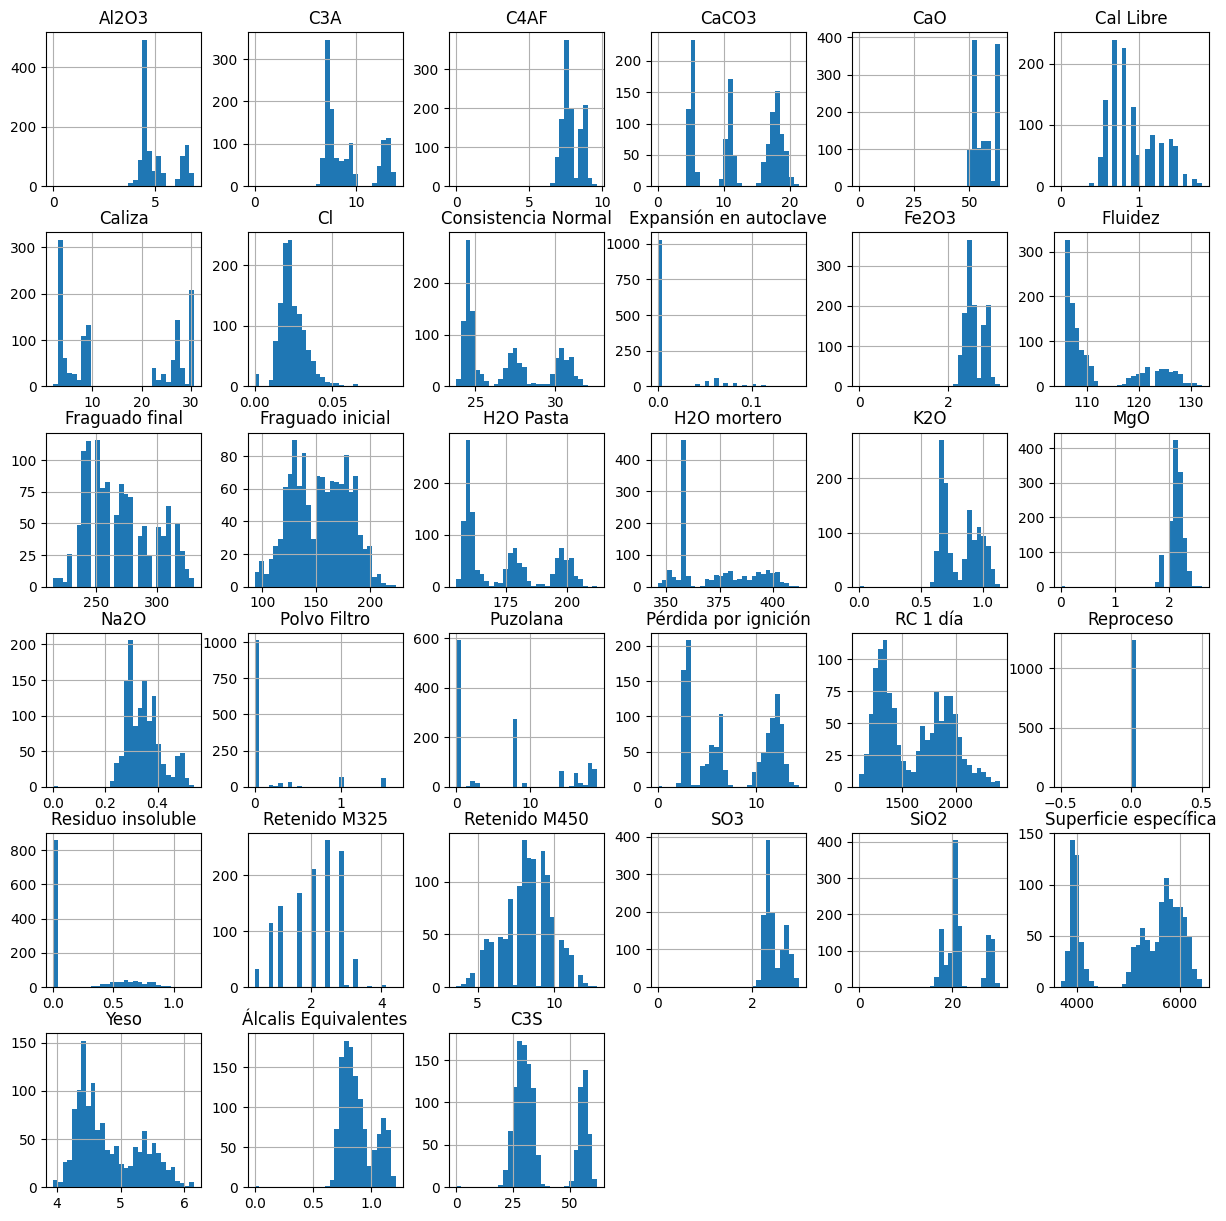

In [23]:
# Vamos a graficar histogramas para todas las variables continuas
variables_num = df1.select_dtypes(include=['float64','int64']).columns
variables_num = variables_num.drop('Periodo')

df1[variables_num].hist(bins=30, figsize=(15,15))
plt.show()

Las variables no están distribuidas normalmente. Y hay algunas en particular que están extremadamente sesgadas como 3SsnPorch, ScreenPorch y MiscVal.

A veces, transformar las variables para mejorar la dispersión de los valores, mejora el rendimiento del modelo. Pero es poco probable que una transformación ayude a cambiar la distribución de las variables extremadamente sesgadas de manera drástica.

Podemos aplicar una transformación Yeo-Johnson a variables como LotFrontage, LotArea, BsmUnfSF, y una transformación binaria a variables como 3SsnPorch, ScreenPorch y MiscVal.

Vamos a hacerlo.

In [ ]:
# # primero hagamos una lista con las variables extremadamente sesgadas
# # para más adelante

# skewed = [
#     'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
#     '3SsnPorch', 'ScreenPorch', 'MiscVal'
# ]

In [ ]:
# # capturar las variables continuas restantes

# cont_vars = [
#     'LotFrontage',
#     'LotArea',
#     'MasVnrArea',
#     'BsmtFinSF1',
#     'BsmtUnfSF',
#     'TotalBsmtSF',
#     '1stFlrSF',
#     '2ndFlrSF',
#     'GrLivArea',
#     'GarageArea',
#     'WoodDeckSF',
#     'OpenPorchSF',
# ]

-------------------------------------------------------------------------------
#### **3.4. Yeo-Johnson transformation**
-------------------------------------------------------------------------------

In [24]:
df1.head(2)

FECHAENSAYO  Al2O3   C3A  C4AF  CaCO3   CaO  Cal Libre  Caliza     Cl  \
0  2024-01-02    4.6  7.30  8.86   5.29  62.5        1.5    3.35  0.047   
1  2024-01-03    4.7  7.62  8.87   5.40  62.4        1.4    3.40  0.044   

   Consistencia Normal  Expansión en autoclave  Fe2O3  Fluidez  \
0                 25.1                    0.14   2.91    119.0   
1                 25.2                    0.10   2.91    119.0   

   Fraguado final  Fraguado inicial  H2O Pasta  H2O mortero   K2O  MgO  Na2O  \
0           235.0             114.0      163.0        359.0  0.77  2.3  0.34   
1           235.0             113.0      164.0        359.0  0.76  2.2  0.33   

   Polvo Filtro  Puzolana  Pérdida por ignición  RC 1 día  Reproceso  \
0           0.0       0.0                  2.88    2250.0        0.0   
1           0.0       0.0                  2.58    2240.0        0.0   

   Residuo insoluble  Retenido M325  Retenido M450   SO3  SiO2  \
0               0.84            1.2            6.8  2.90  20.1   
1               0.87            1.2            6.8  2.82  19.8   

   Superficie específica  Yeso  Álcalis Equivalentes Tipo_Cemento    C3S  \
0                 4130.0  6.11                  0.85            I  52.12   
1                 4080.0  5.88                  0.83            I  53.42   

   Periodo  
0   202401  
1   202401

Error al transformar la variable Reproceso: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


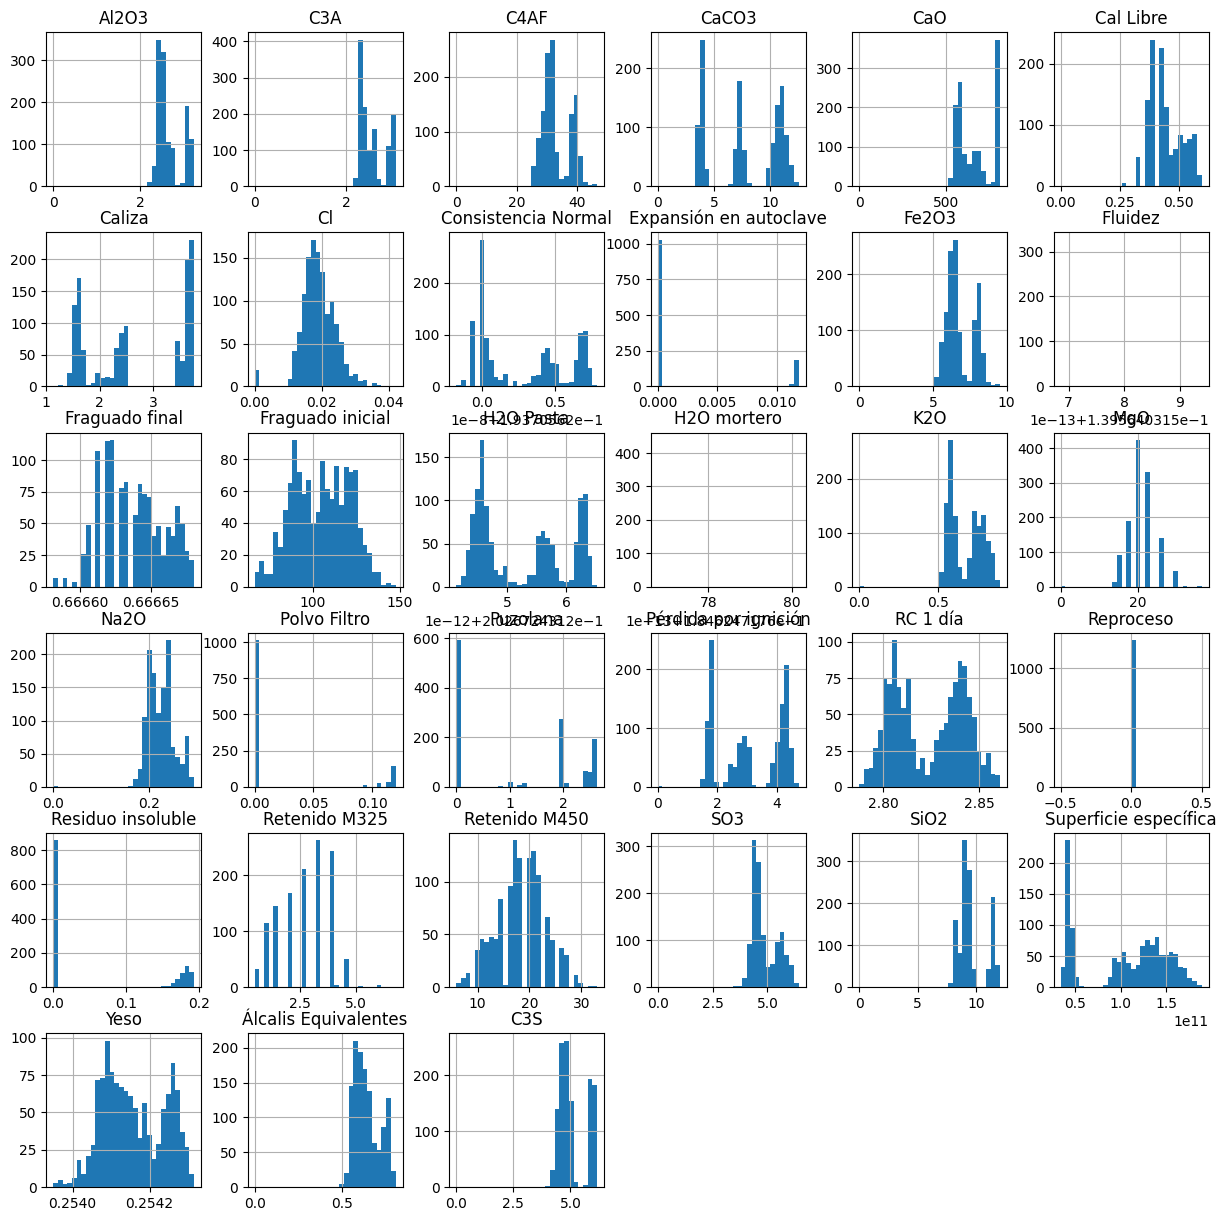

In [25]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
tmp = df1.copy()
cont_vars = variables_num 

# Lista para almacenar variables problemáticas
problematic_vars = []

# Aplicar la transformación Yeo-Johnson a cada variable continua
for var in cont_vars:
    try:
        tmp[var], param = stats.yeojohnson(df1[var])
    except Exception as e:
        print(f'Error al transformar la variable {var}: {e}')
        problematic_vars.append(var)

# Eliminar variables problemáticas de cont_vars
#cont_vars = [var for var in cont_vars if var not in problematic_vars]

# Graficar los histogramas de las variables transformadas
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

In [86]:
problematic_vars

['Reproceso']

Para LotFrontage y MasVnrArea, la transformación no hizo un trabajo sorprendente.

Para las otras, los valores parecen estar distribuidos de manera más uniforme en el rango.

Si esto ayuda a mejorar el poder predictivo, está por verse. Para determinar si este es el caso, deberíamos entrenar un modelo con los valores originales y uno con los valores transformados, y determinar el rendimiento del modelo y la importancia de las características. Pero eso escapa del alcance de este curso.

Aquí, haremos una exploración visual rápida en su lugar:

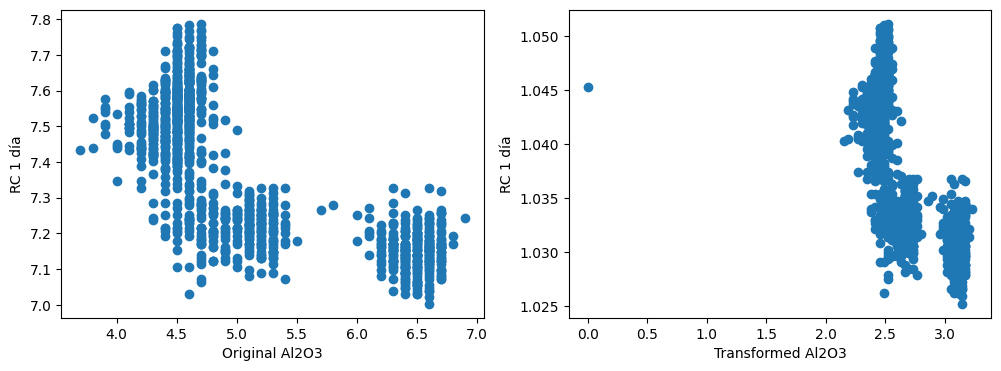

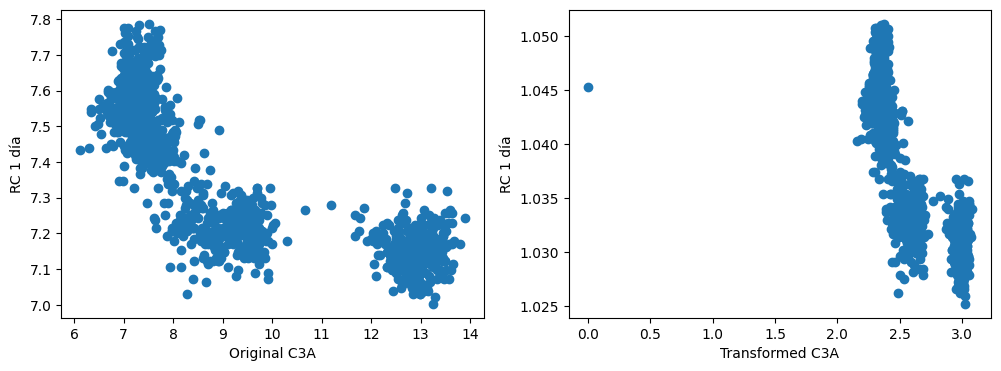

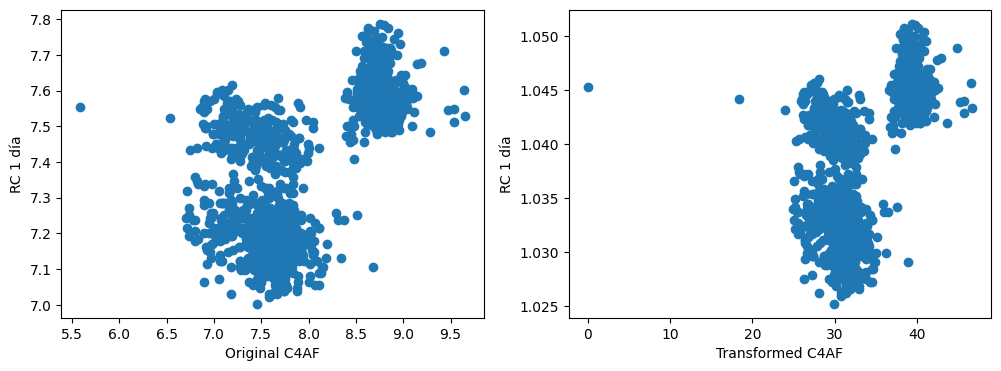

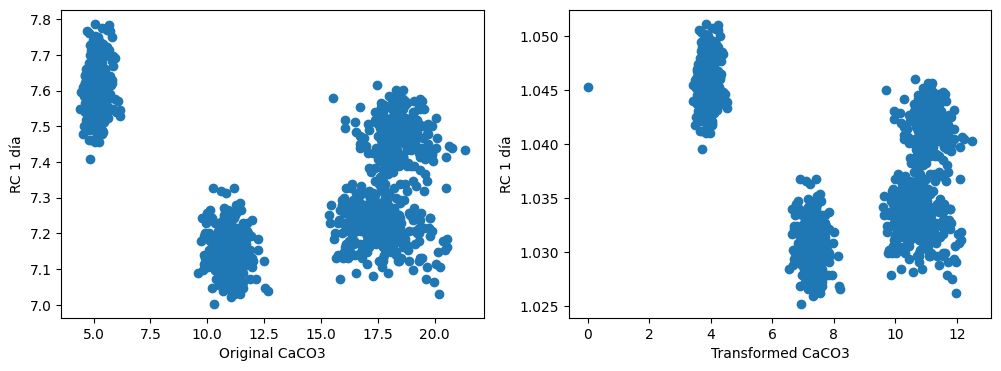

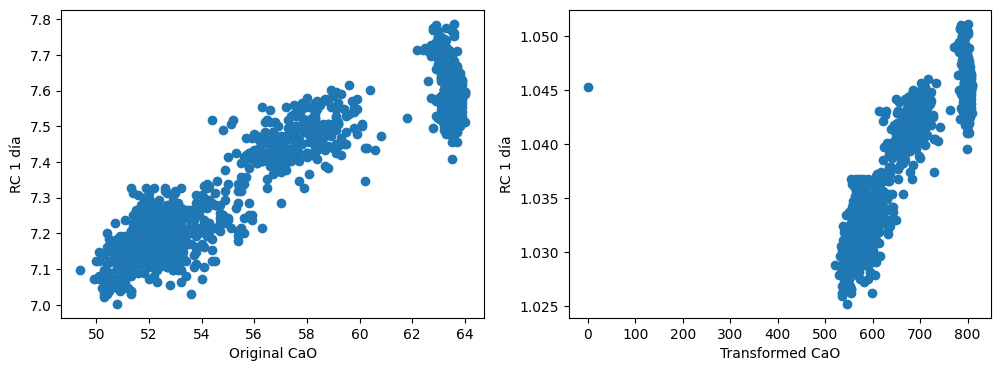

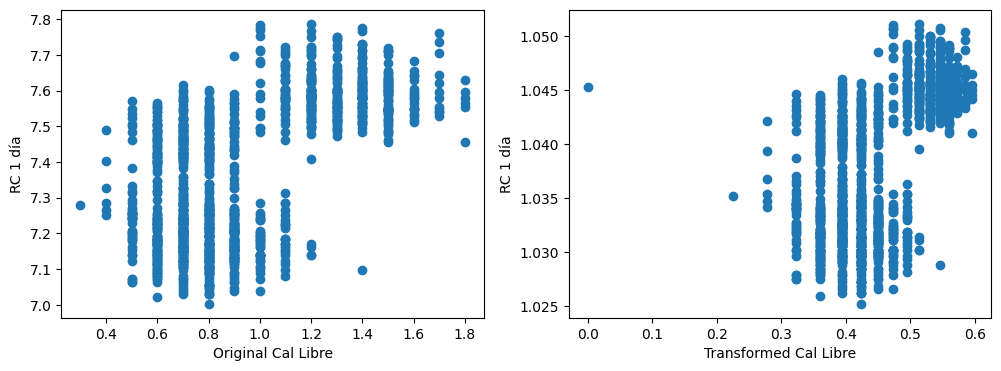

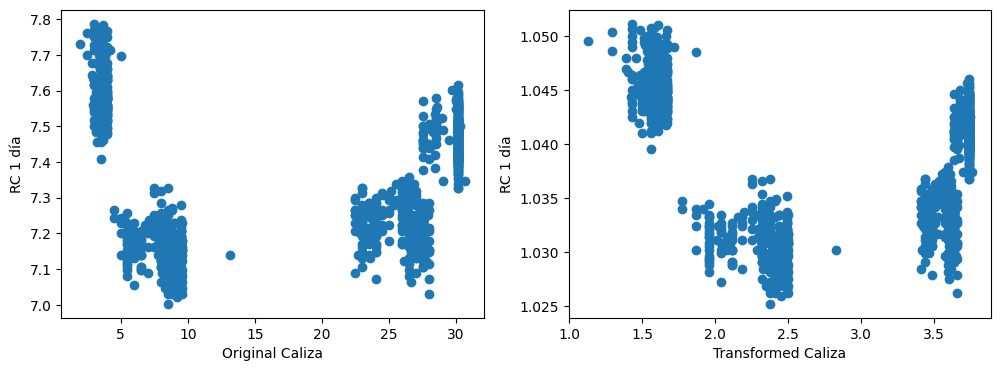

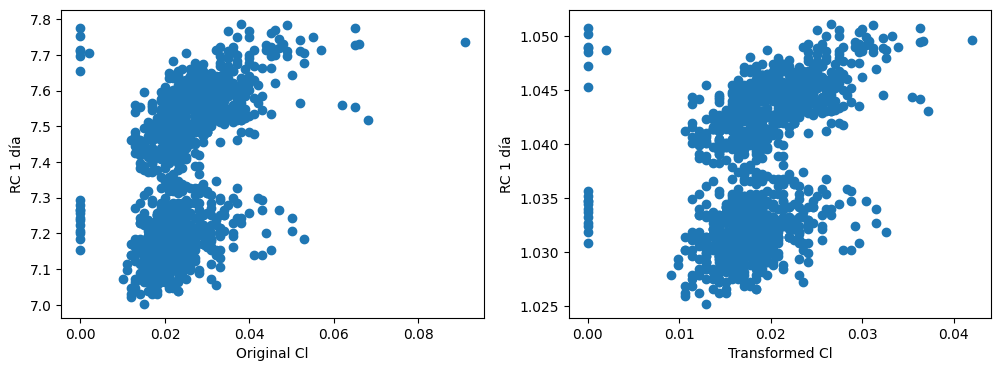

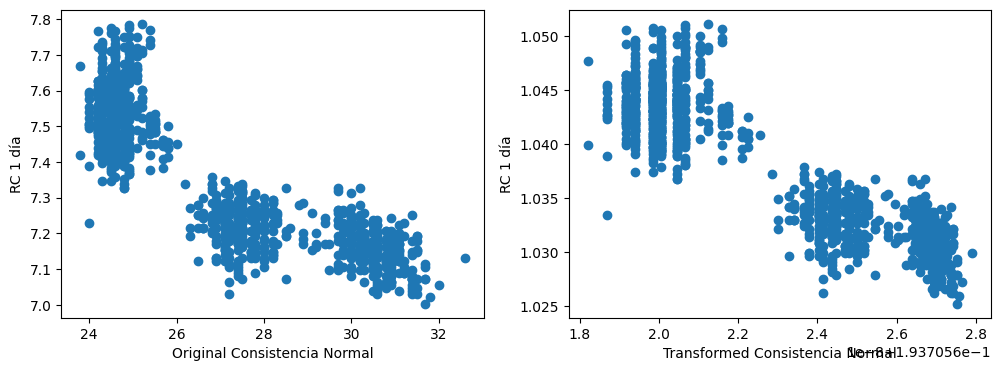

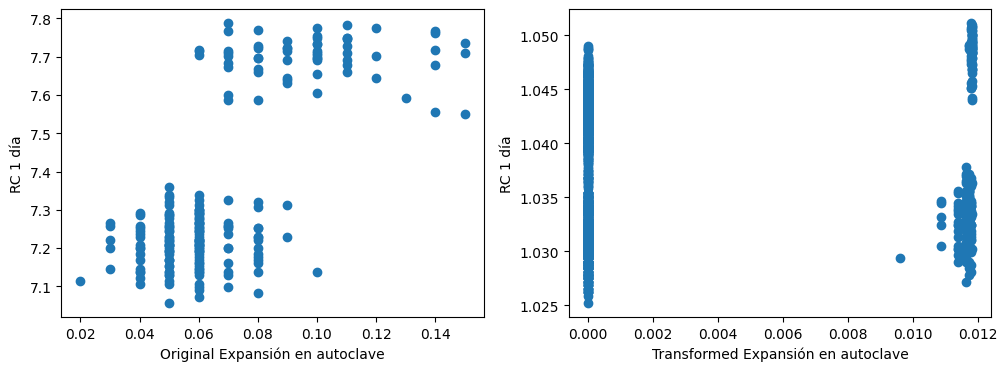

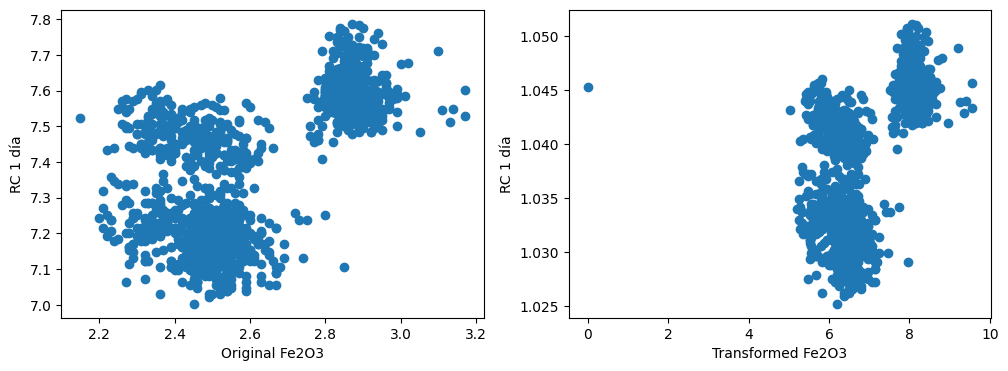

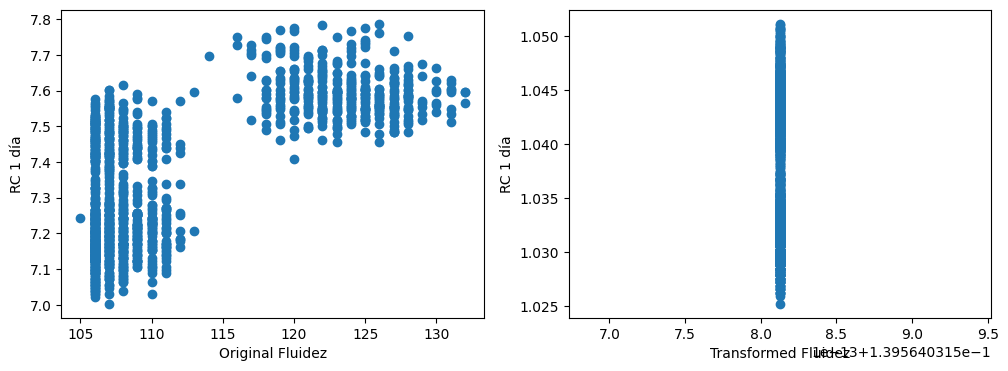

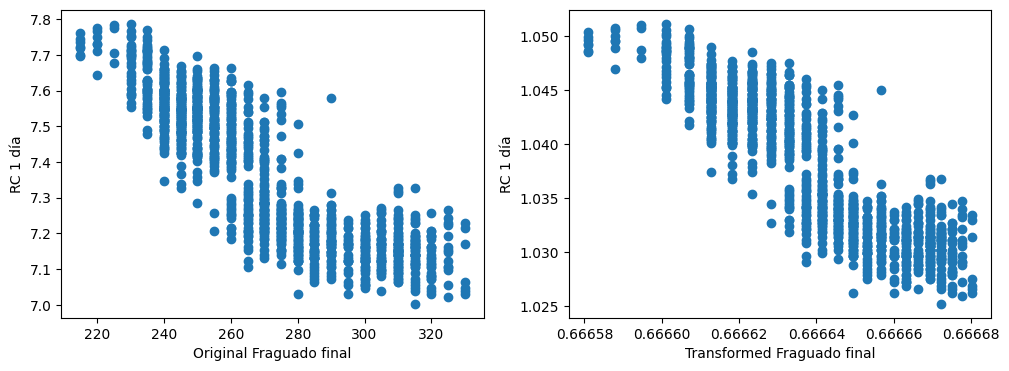

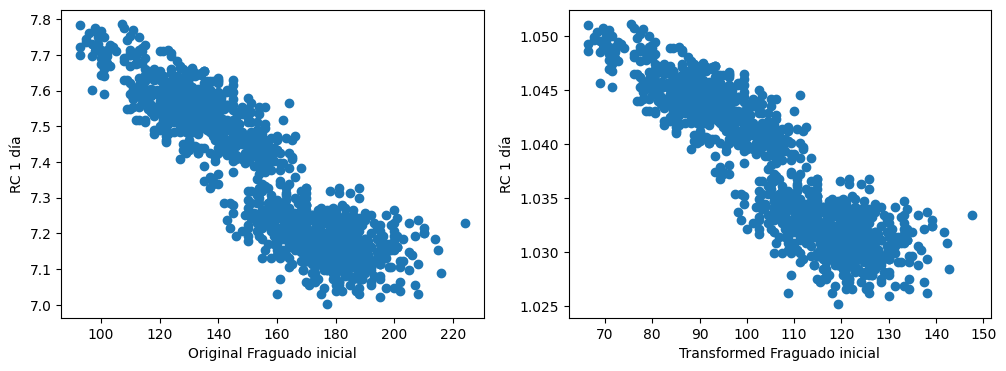

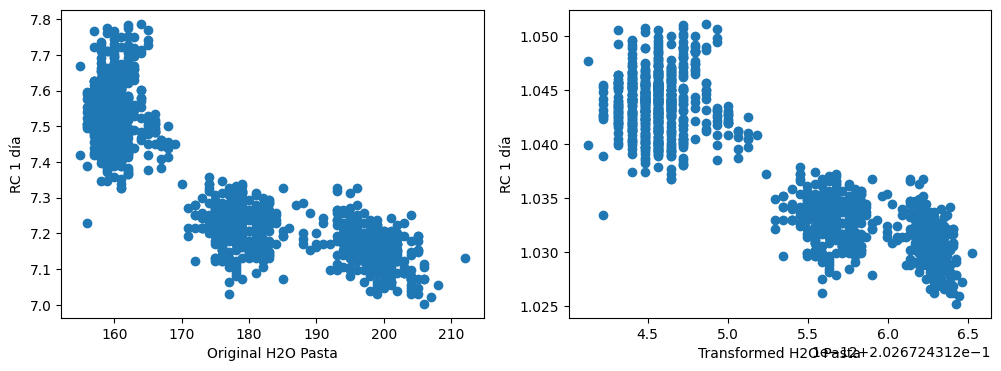

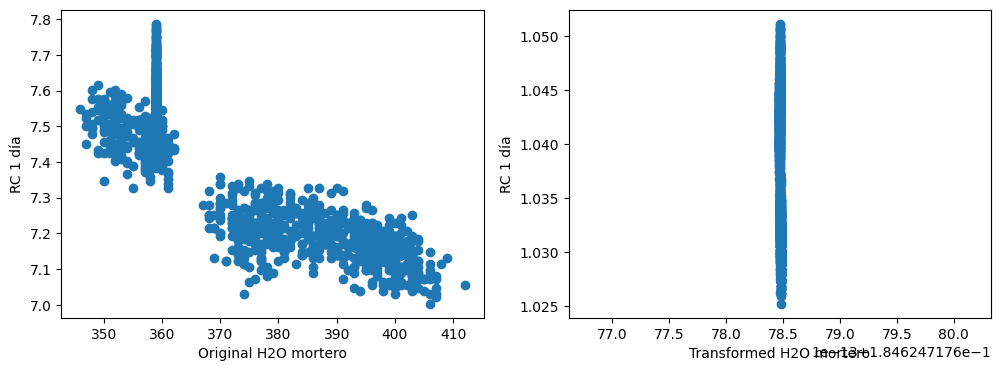

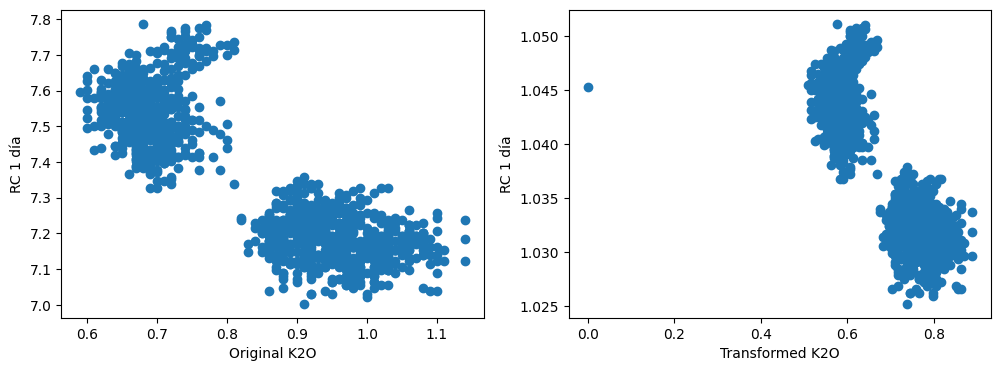

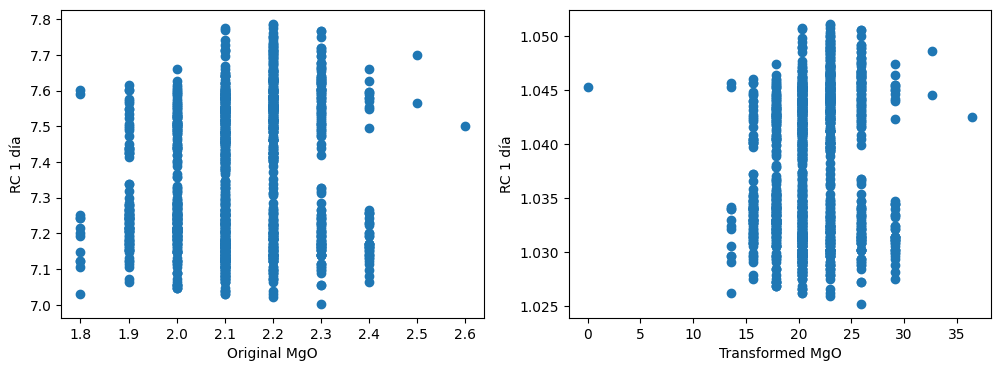

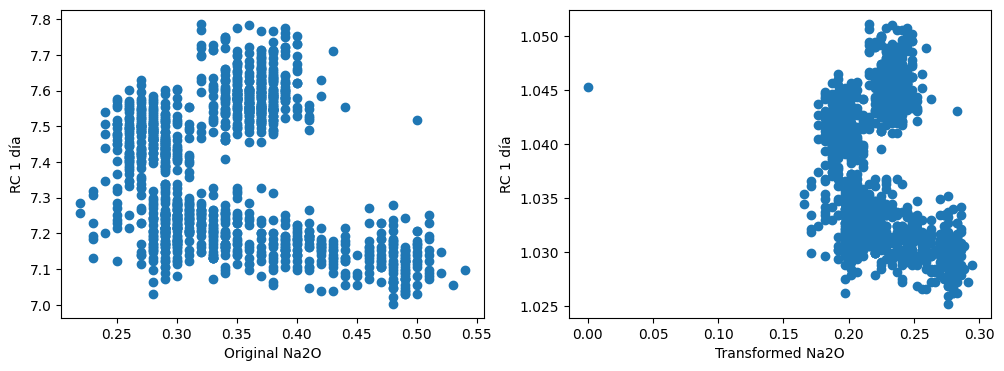

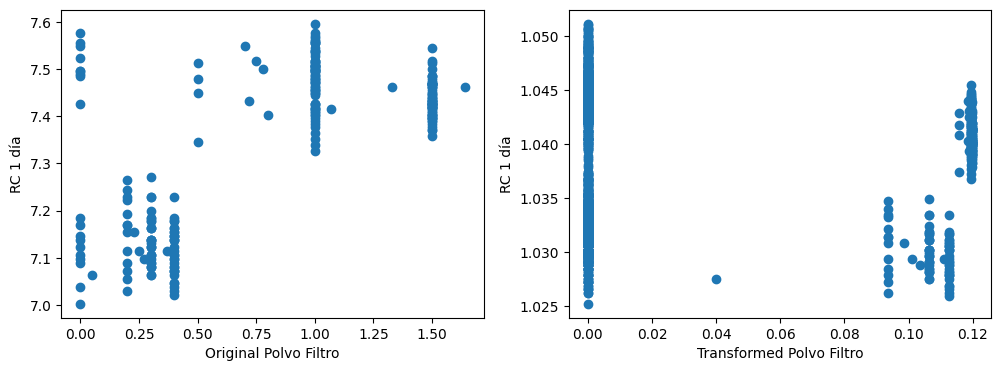

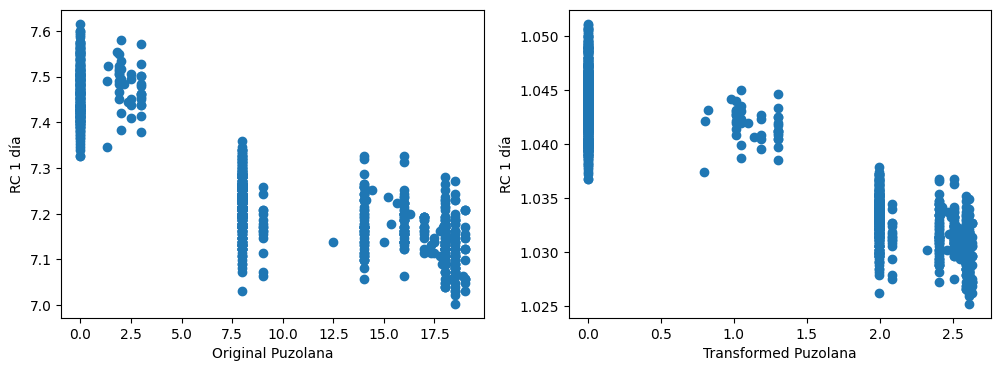

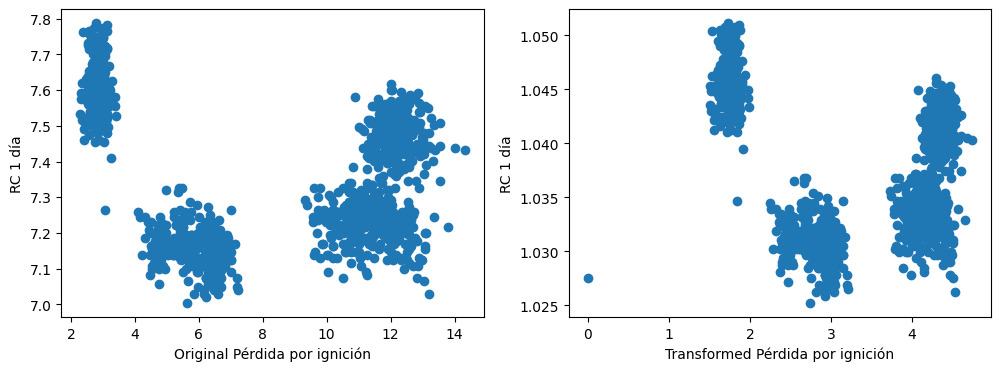

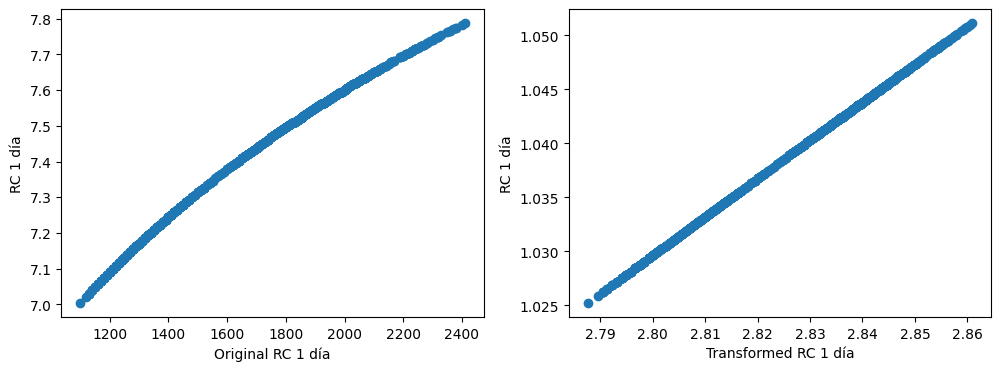

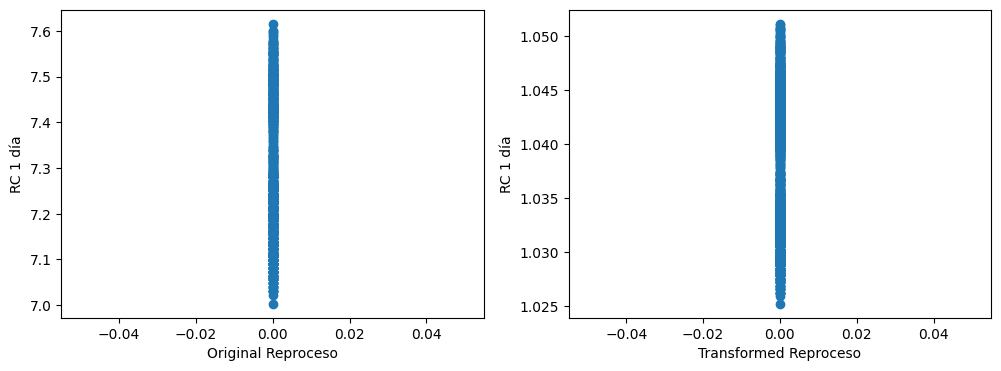

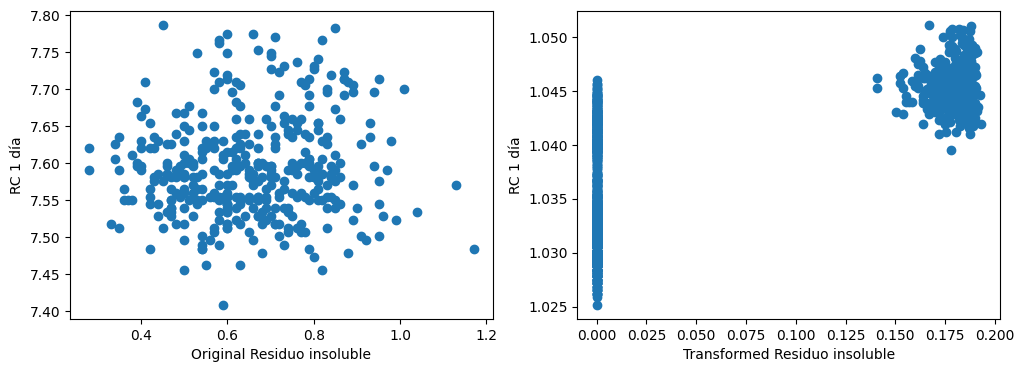

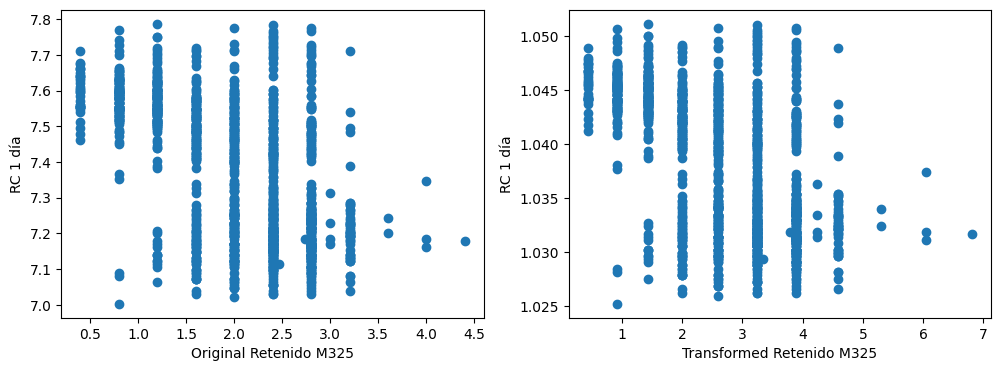

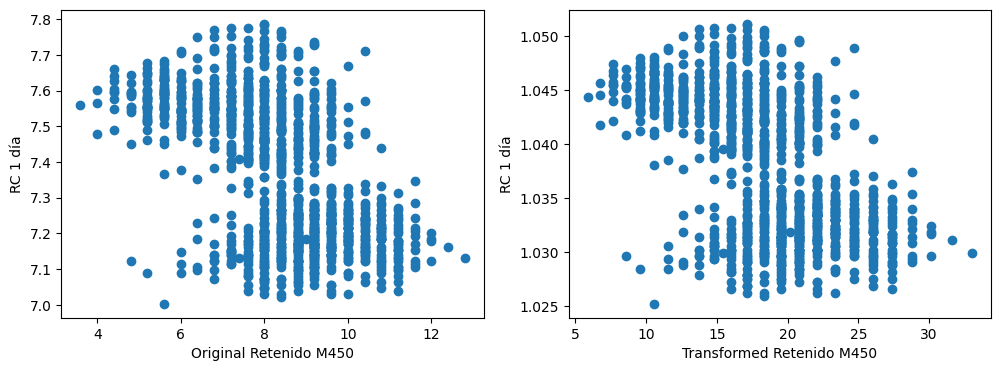

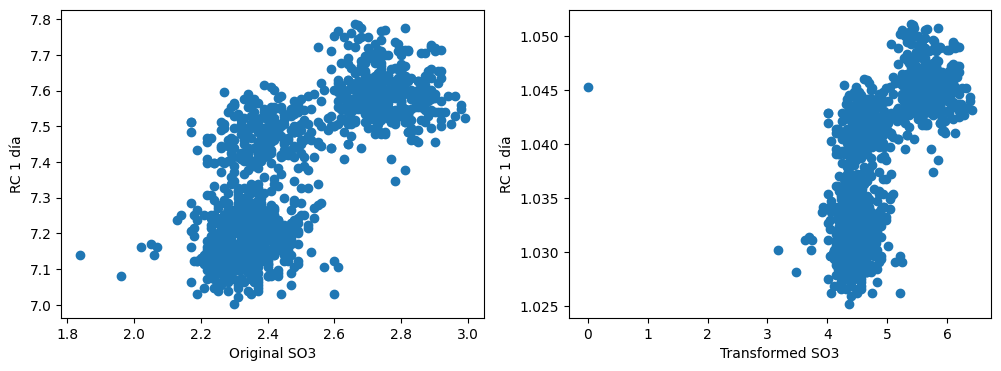

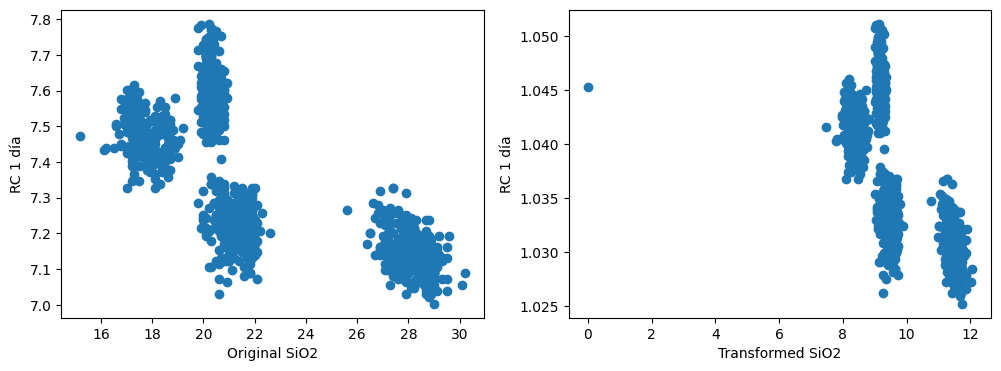

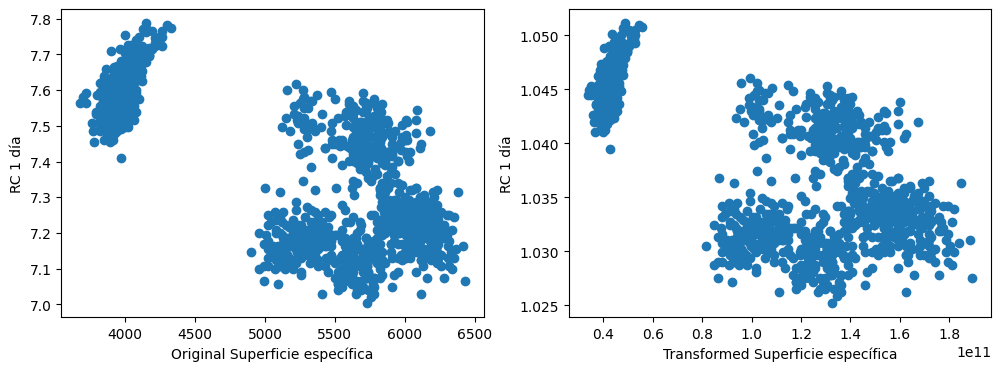

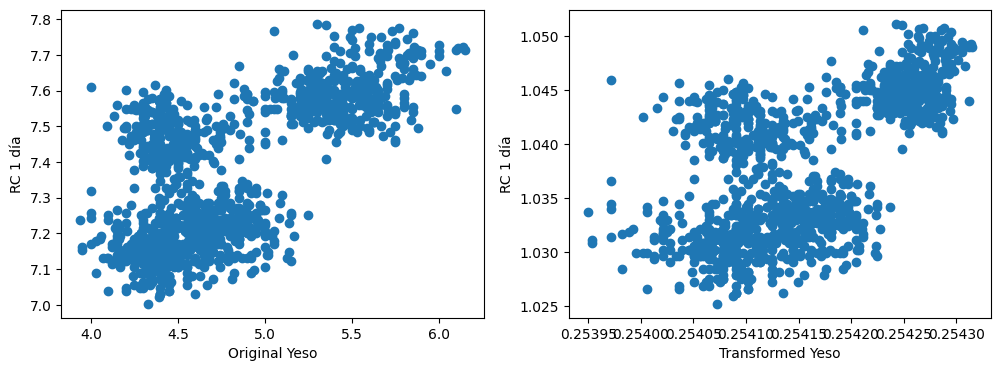

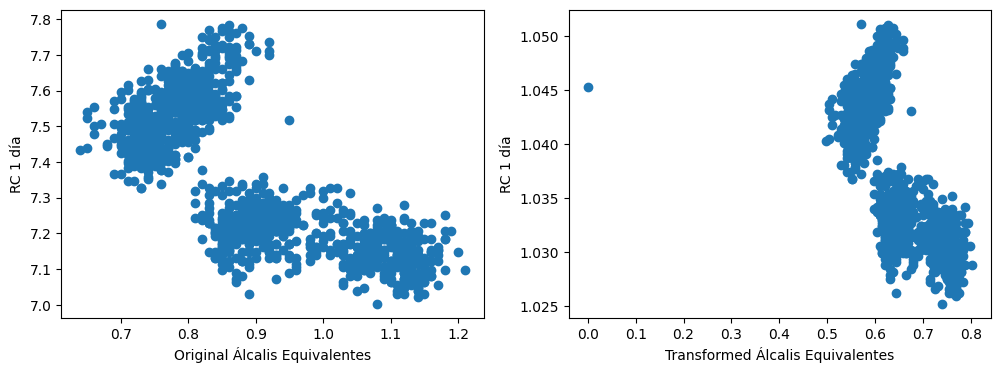

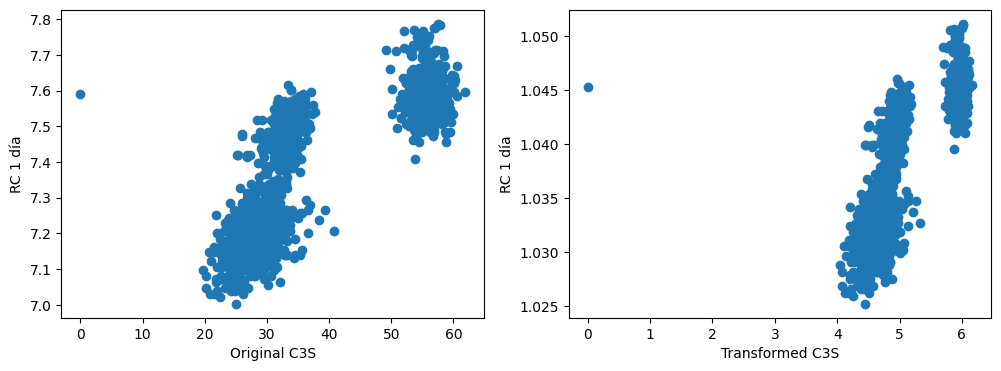

In [26]:
# vamos a graficar las variables originales o transformadas
# vs el precio de venta, y ver si hay una relación

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['RC 1 día']))
    plt.ylabel('RC 1 día')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['RC 1 día']))
    plt.ylabel('RC 1 día')
    plt.xlabel('Transformed ' + var)

    plt.show()

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
## **V. Tratamiento de Datos Categoricos (SOLO SE QUEDA COMO REFERENCIA; NO TENGO DATOS CATEGORICOS)**
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

A simple inspección visual sugiere que las transformaciones parecen mejorar la relación solo para LotArea.

Vamos a intentar una transformación diferente ahora. La mayoría de las variables contienen el valor 0, por lo que no podemos aplicar la transformación logarítmica, pero ciertamente podemos hacerlo para las siguientes variables:

["LotFrontage", "1stFlrSF", "GrLivArea"]

Así que hagamos eso y veamos si eso cambia la distribución de las variables y su relación con el objetivo.

 #### Logarithmic transformation

In [30]:
# # Let's go ahead and analyse the distributions of these variables
# # after applying a logarithmic transformation

# tmp = data.copy()

# for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

#     # transform the variable with logarithm
#     tmp[var] = np.log(data[var])

# tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
# plt.show()

La distribución de las variables ahora parece más "gaussiana".

Vamos a evaluar su relación con el objetivo.

In [ ]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

Las variables transformadas tienen una mejor dispersión de los valores, lo que a su vez puede ayudar a hacer mejores predicciones.

#### Skewed variables (Variables Sesgadas)

Vamos a transformarlas en variables binarias y ver cuán predictivas son:

In [99]:
# for var in skewed:

#     tmp = data.copy()

#     # map the variable values into 0 and 1
#     tmp[var] = np.where(data[var]==0, 0, 1)

#     # determine mean sale price in the mapped values
#     tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

#     # plot into a bar graph
#     tmp.plot(kind="barh", y="mean", legend=False,
#              xerr="std", title="Sale Price", color='green')

#     plt.show()

Parece haber una diferencia en el precio de venta en los valores mapeados, pero los intervalos de confianza se superponen, por lo que probablemente esto no sea significativo ni predictivo.

#### Categorical variables

Vamos a analizar las variables categóricas presentes en el conjunto de datos.

In [100]:
# print('Numero de Variables Categóricas: ', len(cat_vars))

In [101]:
# # let's visualise the values of the categorical variables
# data[cat_vars].head()

#### Number of labels: cardinality

Evaluemos cuántas categorías diferentes están presentes en cada una de las variables.

In [102]:
# # we count unique categories with pandas unique()
# # and then plot them in descending order

# data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

Todas las variables categóricas muestran baja cardinalidad, lo que significa que tienen pocas etiquetas diferentes. Esto es bueno ya que no necesitaremos abordar la cardinalidad durante nuestra clase de ingeniería de características.

#### Quality variables

Hay una serie de variables que se refieren a la calidad de algún aspecto de la casa, por ejemplo, el garaje, la cerca o la cocina. Reemplazaré estas categorías por números que aumenten con la calidad del lugar o habitación.

Las asignaciones se pueden obtener del sitio web de Kaggle. Un ejemplo:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical (Promedio)
- Fa =	Fair (Regular)
- Po = Poor (Pobre)

In [103]:
# # re-map strings to numbers, which determine quality

# qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

# qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#              'HeatingQC', 'KitchenQual', 'FireplaceQu',
#              'GarageQual', 'GarageCond',
#             ]

# for var in qual_vars:
#     data[var] = data[var].map(qual_mappings)

In [104]:
# exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

# var = 'BsmtExposure'

# data[var] = data[var].map(exposure_mappings)

In [105]:
# finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

# finish_vars = ['BsmtFinType1', 'BsmtFinType2']

# for var in finish_vars:
#     data[var] = data[var].map(finish_mappings)

In [106]:
# garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

# var = 'GarageFinish'

# data[var] = data[var].map(garage_mappings)

In [107]:
# fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

# var = 'Fence'

# data[var] = data[var].map(fence_mappings)

In [108]:
# # capture all quality variables

# qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

In [109]:
# # ahora vamos a graficar el precio de venta promedio de la casa basado en la calidad de los
# # varios atributos

# for var in qual_vars:
#     # make boxplot with Catplot
#     sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
#     plt.show()

Para la mayoría de los atributos, el aumento en el precio de la casa con el valor de la variable es bastante claro.

In [110]:
# # capturamos las variables categóricas restantes
# # (aquellas que no reasignamos)

# cat_others = [
#     var for var in cat_vars if var not in qual_vars
# ]

# len(cat_others)

#### Rare labels:

Vamos a investigar ahora si hay etiquetas que están presentes solo en un pequeño número de casas:

In [111]:
# def analyse_rare_labels(df, var, rare_perc):
#     df = df.copy()

#     # determine the % of observations per category
#     tmp = df.groupby(var)['SalePrice'].count() / len(df)

#     # return categories that are rare
#     return tmp[tmp < rare_perc]

# # print categories that are present in less than
# # 1 % of the observations

# for var in cat_others:
#     print(analyse_rare_labels(data, var, 0.01))
#     print()

Algunas de las variables categóricas muestran múltiples etiquetas que están presentes en menos del 1% de las casas.

Las etiquetas que están subrepresentadas en el conjunto de datos tienden a causar sobreajuste en los modelos de aprendizaje automático.

Es por eso que queremos eliminarlas.

Finalmente, queremos explorar la relación entre las categorías de las diferentes variables y el precio de venta de las casas:

In [112]:
# for var in cat_others:
#     # make boxplot with Catplot
#     sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
#     plt.show()

Claramente, las categorías proporcionan información sobre el precio de venta, ya que diferentes categorías muestran diferentes precios de venta medianos.

**Disclaimer:**

Ciertamente, se puede hacer mucho más para entender la naturaleza de estos datos y la relación de estas variables con el objetivo, SalePrice. Y también sobre la distribución de las propias variables.

Sin embargo, esperamos que a través de este Notebook te hayamos dado una idea de cómo se ve el análisis de datos.